In [ ]:
# Verify Chr22 ExWAS results before running REGENIE on all other chromosomes

## APOL1 test

In [69]:
import pandas as pd
import os

import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Directory containing the GWAS results files
directory = '/home/jupyter/gcs/ukb/regenie/gwas_chr22prots/step2/'

In [20]:
# List of file names for each chromosome for APOL1
apol1_files = [filename for filename in os.listdir(directory) if filename.startswith('chr') and filename.endswith('.regenie') and ("apol1" in filename)]

In [26]:
# Read and append DataFrames for each chromosome
dfs = []
for file_name in apol1_files:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path, sep=' ')
    dfs.append(df)

In [27]:
# Merge DataFrames
apol1 = pd.concat(dfs, ignore_index=True)

In [29]:
# Sort SNPs by chromosome and position
apol1 = apol1.sort_values(['CHROM', 'GENPOS'])

In [30]:
apol1.head()

,CHROM,GENPOS,ID,ALLELE0,ALLELE1,A1FREQ,N,TEST,BETA,SE,CHISQ,LOG10P,EXTRA
247682,1,1020177,1:1020177:C:A,C,A,0.000117,42899,ADD,-0.162150,0.296460,0.299157,0.233281,NaN
247683,1,1020177,1:1020177:C:T,C,T,0.000012,42899,ADD,1.102370,0.935029,1.389960,0.622671,NaN
247684,1,1020179,1:1020179:G:A,G,A,0.000012,42901,ADD,0.029675,0.935034,0.001007,0.011137,NaN
247685,1,1020183,1:1020183:G:C,G,C,0.001329,42899,ADD,0.017988,0.089216,0.040649,0.075609,NaN
247686,1,1020186,1:1020186:C:T,C,T,0.000012,42904,ADD,-1.113480,0.936235,1.414470,0.630199,NaN


### Q-Q Plot

In [124]:
# index each SNP
apol1['IND'] = range(len(apol1))

In [145]:
range(len(apol1))[0]/(len(apol1)+1)

0.0

In [148]:
(apol1['IND'][::-1]+1)/(len(apol1)+1)

592817    0.999998
592816    0.999997
592815    0.999995
592814    0.999993
592813    0.999992
            ...   
247686    0.000008
247685    0.000007
247684    0.000005
247683    0.000003
247682    0.000002
Name: IND, Length: 592818, dtype: float64

<Figure size 1500x800 with 0 Axes>

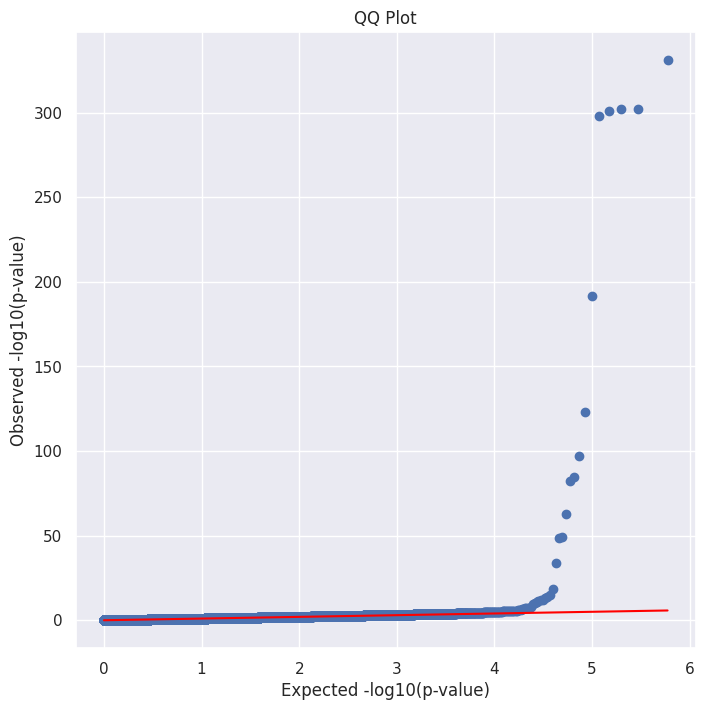

In [149]:
# create QQ plot
plt.figure(figsize=(15, 8))
observed = apol1.sort_values(['LOG10P'])['LOG10P']
expected = -np.log10((apol1['IND'][::-1]+1)/len(apol1))
plt.figure(figsize=(8, 8))
plt.scatter(expected, observed)
plt.plot(expected, expected, color='red')
plt.xlabel('Expected -log10(p-value)')
plt.ylabel('Observed -log10(p-value)')
plt.title('QQ Plot')
plt.show()

### Manhattan Plot

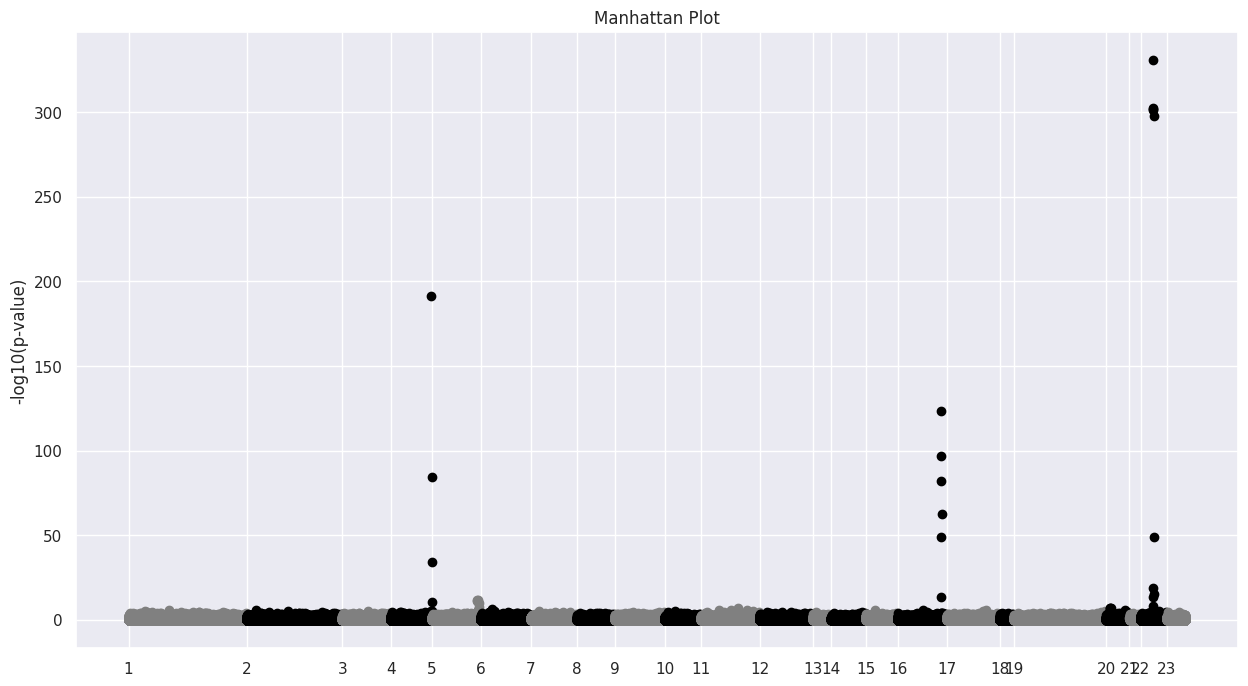

In [68]:
# Create Manhattan plot
plt.figure(figsize=(15, 8))
colors = ['gray','black']
x_labels = []
x_labels_pos = []

for i, (chrom, group) in enumerate(apol1.groupby('CHROM')):
    plt.scatter(group['IND'], group['LOG10P'], color=colors[i % len(colors)])
    x_labels.append(chrom)
    x_labels_pos.append((group['IND'].iloc[-1] - (group['IND'].iloc[-1] - group['IND'].iloc[0])))

plt.ylabel('-log10(p-value)')
plt.title('Manhattan Plot')
plt.xticks(x_labels_pos, labels=x_labels)
plt.show()

# Plot Function

In [1]:
import pandas as pd
import os

import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Directory containing the GWAS results files
directory = '/home/jupyter/gcs/ukb/regenie/gwas_chr22prots/step2/'

In [ ]:
def plot_gwas_results(directory, phenotype):
    """
    Read, merge, and plot GWAS results for a given phenotype/protein.
    
    Parameters:
    - directory (str): Directory containing the GWAS results files.
    - phenotype (str): Name of the phenotype (protein name).
    """
    
    # List of file names for each chromosome for the phenotype
    file_names = [filename for filename in os.listdir(directory)
                  if filename.startswith('chr') and filename.endswith('.regenie') and (phenotype.lower() in filename)]

    # Read and append DataFrames for each chromosome
    dfs = []
    for file_name in file_names:
        file_path = os.path.join(directory, file_name)
        df = pd.read_csv(file_path, sep=' ')
        dfs.append(df)

    # Merge DataFrames
    df = pd.concat(dfs, ignore_index=True)

    # Filter variants with MAC > 5
    df_ac = df[2*df['A1FREQ']*df['N'] > 5]
    
    # Sort SNPs by chromosome and position
    df = df.sort_values(['CHROM', 'GENPOS'])
    df_ac = df_ac.sort_values(['CHROM', 'GENPOS'])
    
    # Index each SNP
    df['IND'] = range(len(df))
    df_ac['IND'] = range(len(df_ac))
    
    # Initialise 2x2 plot subgrid
    sns.set()
    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    
    # create QQ plots
    observed = df.sort_values(['LOG10P'])['LOG10P']
    expected = -np.log10((df['IND'][::-1]+1)/len(df))    
    ax[0,0].scatter(expected, observed)
    ax[0,0].plot(expected, expected, color='red')
    ax[0,0].set_xlabel('Expected -log10(p-value)')
    ax[0,0].set_ylabel('Observed -log10(p-value)')
    ax[0,0].set_title(f'{phenotype} QQ Plot')
    
    observed_ac = df_ac.sort_values(['LOG10P'])['LOG10P']
    expected_ac = -np.log10((df_ac['IND'][::-1]+1)/len(df_ac))    
    ax[0,1].scatter(expected_ac, observed_ac)
    ax[0,1].plot(expected_ac, expected_ac, color='red')
    ax[0,1].set_xlabel('Expected -log10(p-value)')
    ax[0,1].set_ylabel('Observed -log10(p-value)')
    ax[0,1].set_title(f'{phenotype}, MAC>5 QQ Plot')

    # Create Manhattan plots
    colors = ['gray','black']
    x_labels = []
    x_labels_pos = []
    for i, (chrom, group) in enumerate(df.groupby('CHROM')):
        ax[1,0].scatter(group['IND'], group['LOG10P'], color=colors[i % len(colors)])
        x_labels.append(chrom)
        x_labels_pos.append((group['IND'].iloc[-1] - (group['IND'].iloc[-1] - group['IND'].iloc[0])))
    ax[1,0].set_ylabel('-log10(p-value)')
    ax[1,0].set_title(f'{phenotype} Manhattan Plot')
    ax[1,0].set_xticks(x_labels_pos, labels=x_labels)
    
    x_labels = []
    x_labels_pos = []
    for i, (chrom, group) in enumerate(df_ac.groupby('CHROM')):
        ax[1,1].scatter(group['IND'], group['LOG10P'], color=colors[i % len(colors)])
        x_labels.append(chrom)
        x_labels_pos.append((group['IND'].iloc[-1] - (group['IND'].iloc[-1] - group['IND'].iloc[0])))
    ax[1,1].set_ylabel('-log10(p-value)')
    ax[1,1].set_title(f'{phenotype}, MAC>5 Manhattan Plot')
    ax[1,1].set_xticks(x_labels_pos, labels=x_labels)
    
    # Display plots
    plt.show()

# Chr22 Verification

## APOL1

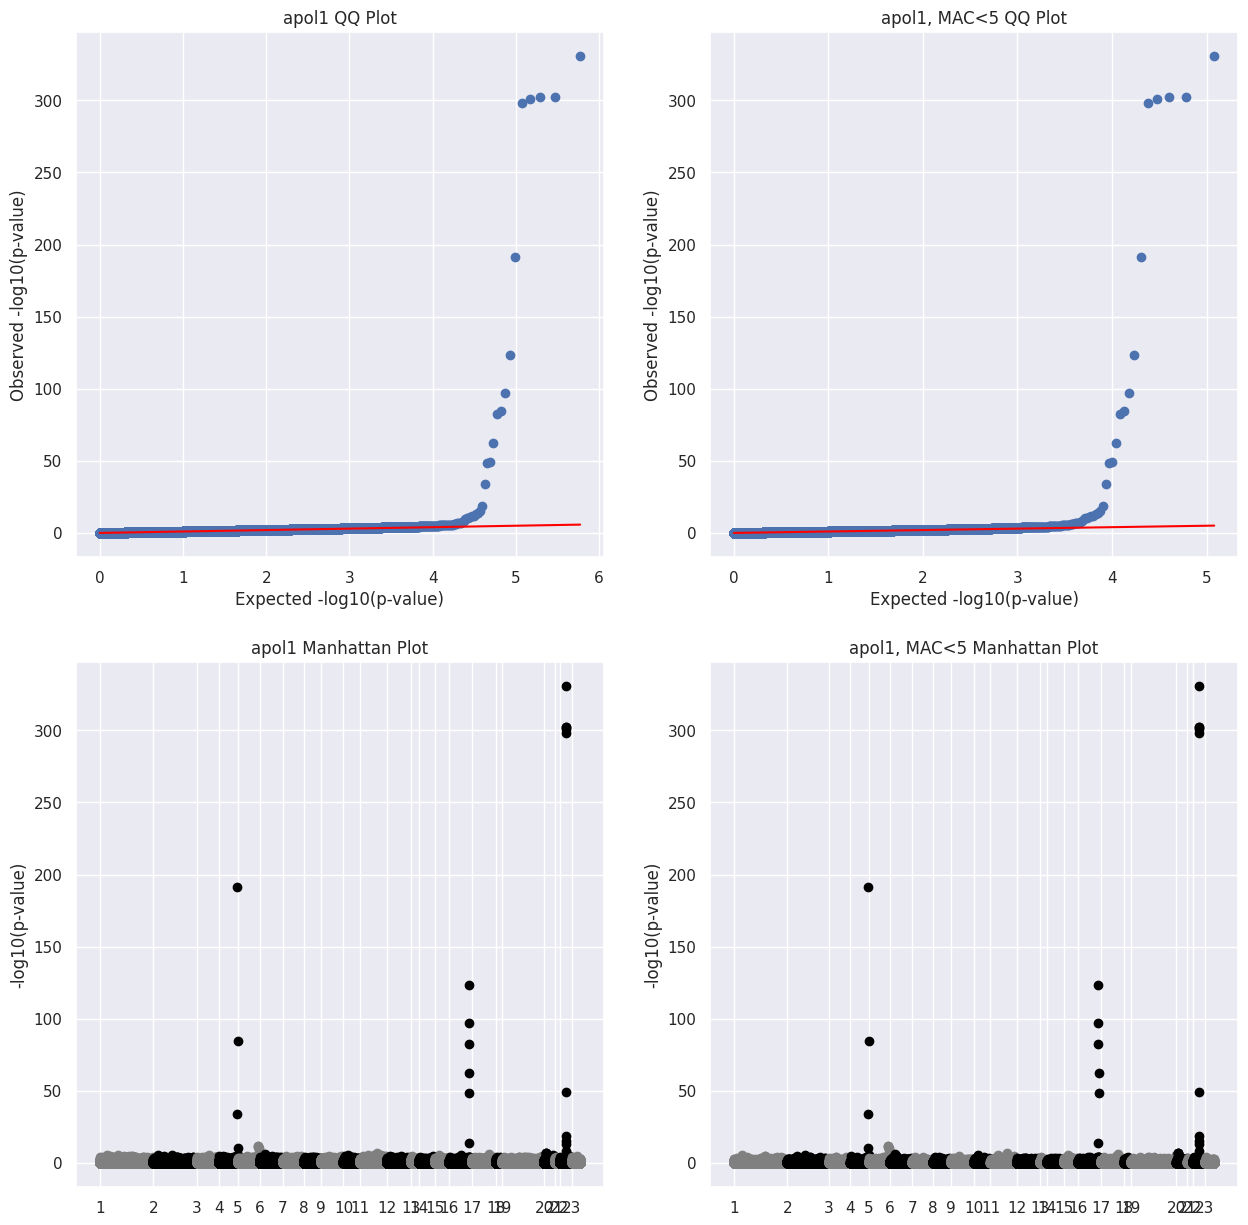

In [4]:
plot_gwas_results(directory, "apol1")

## 10 random proteins

In [6]:
# List of the chr22 olink proteins
proteins = []
with open('/home/jupyter/gcs/ukb/regenie/chr22_olink_genes.txt') as file:
    for line in file:
        proteins.append(line.rstrip())

In [7]:
# Randomly select 10 proteins from the list
import random
samp = random.sample(proteins, 10)

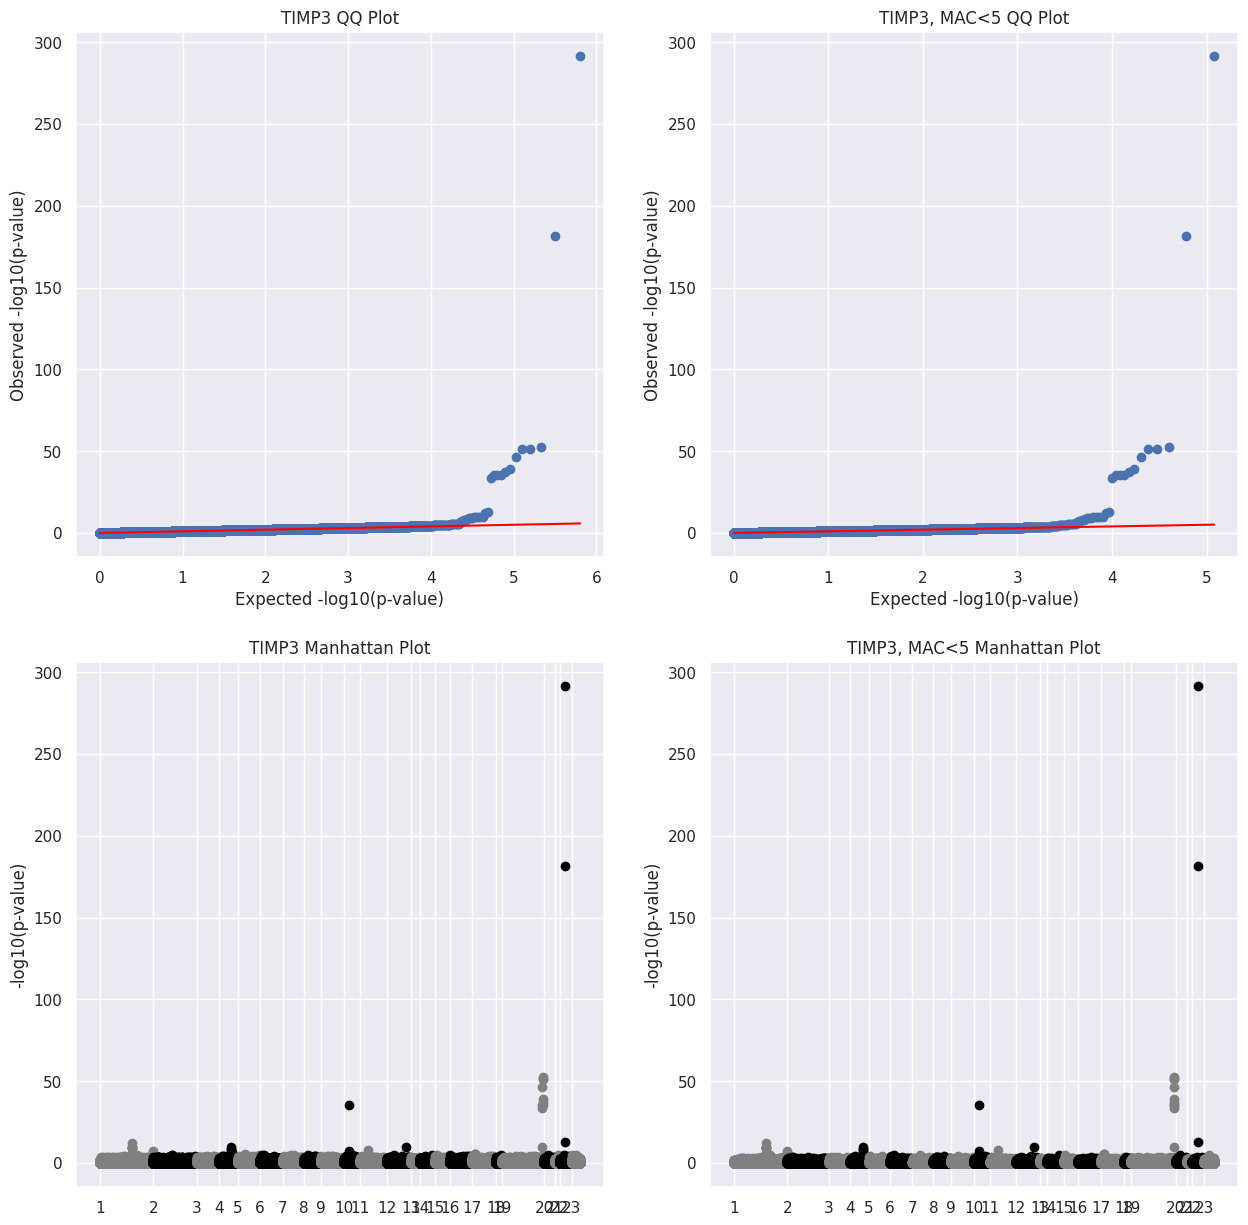

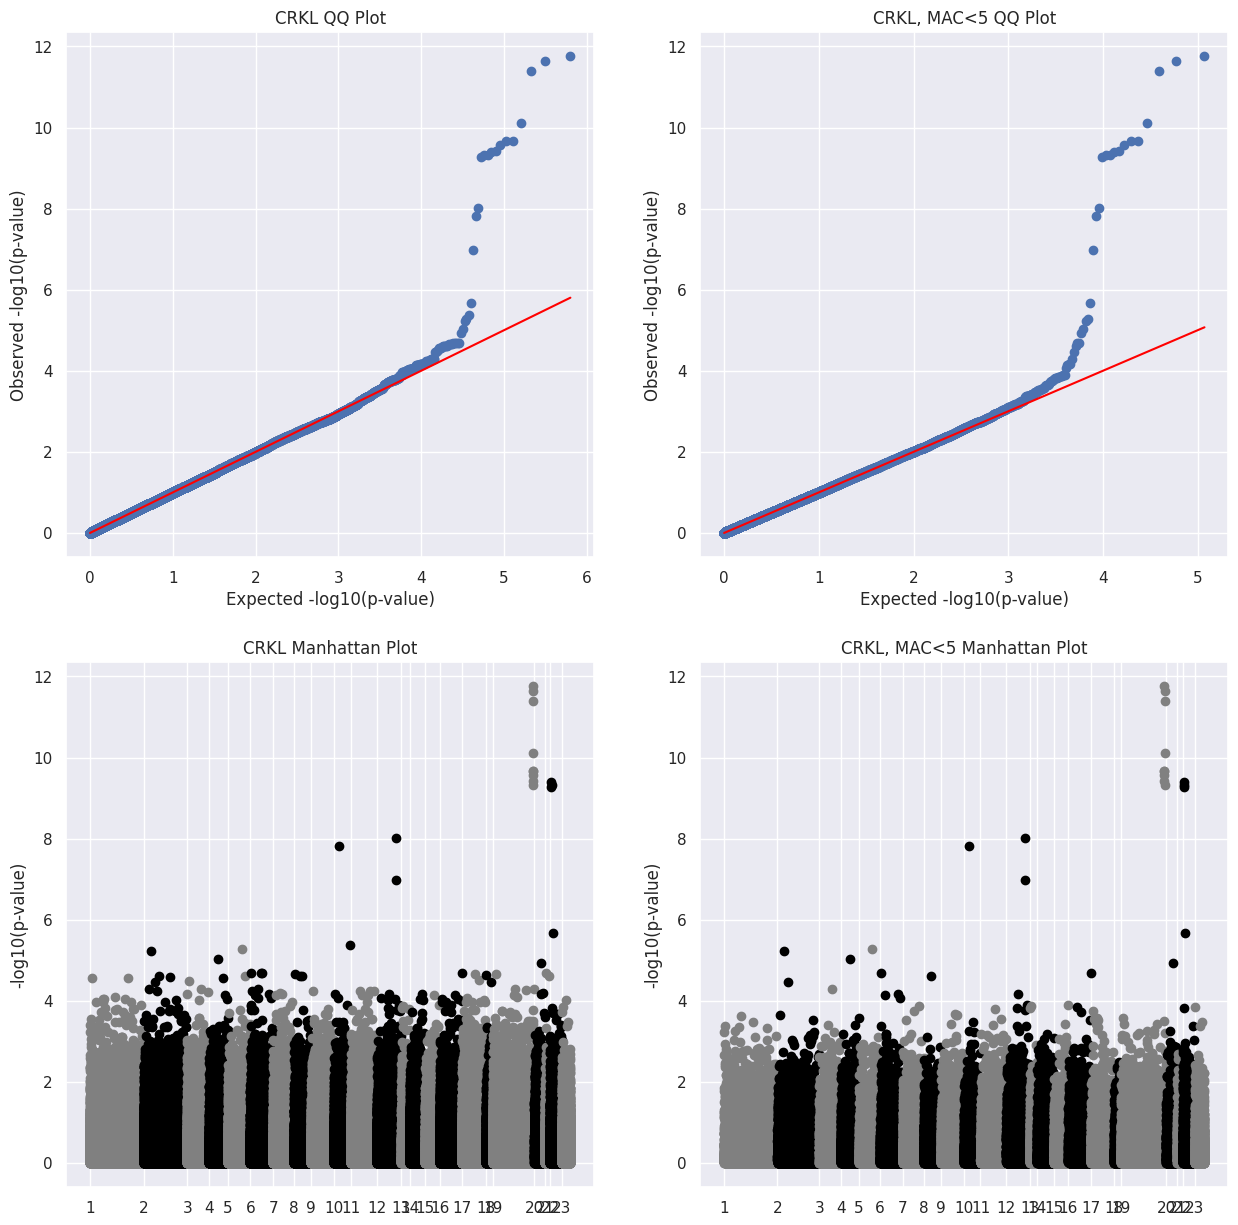

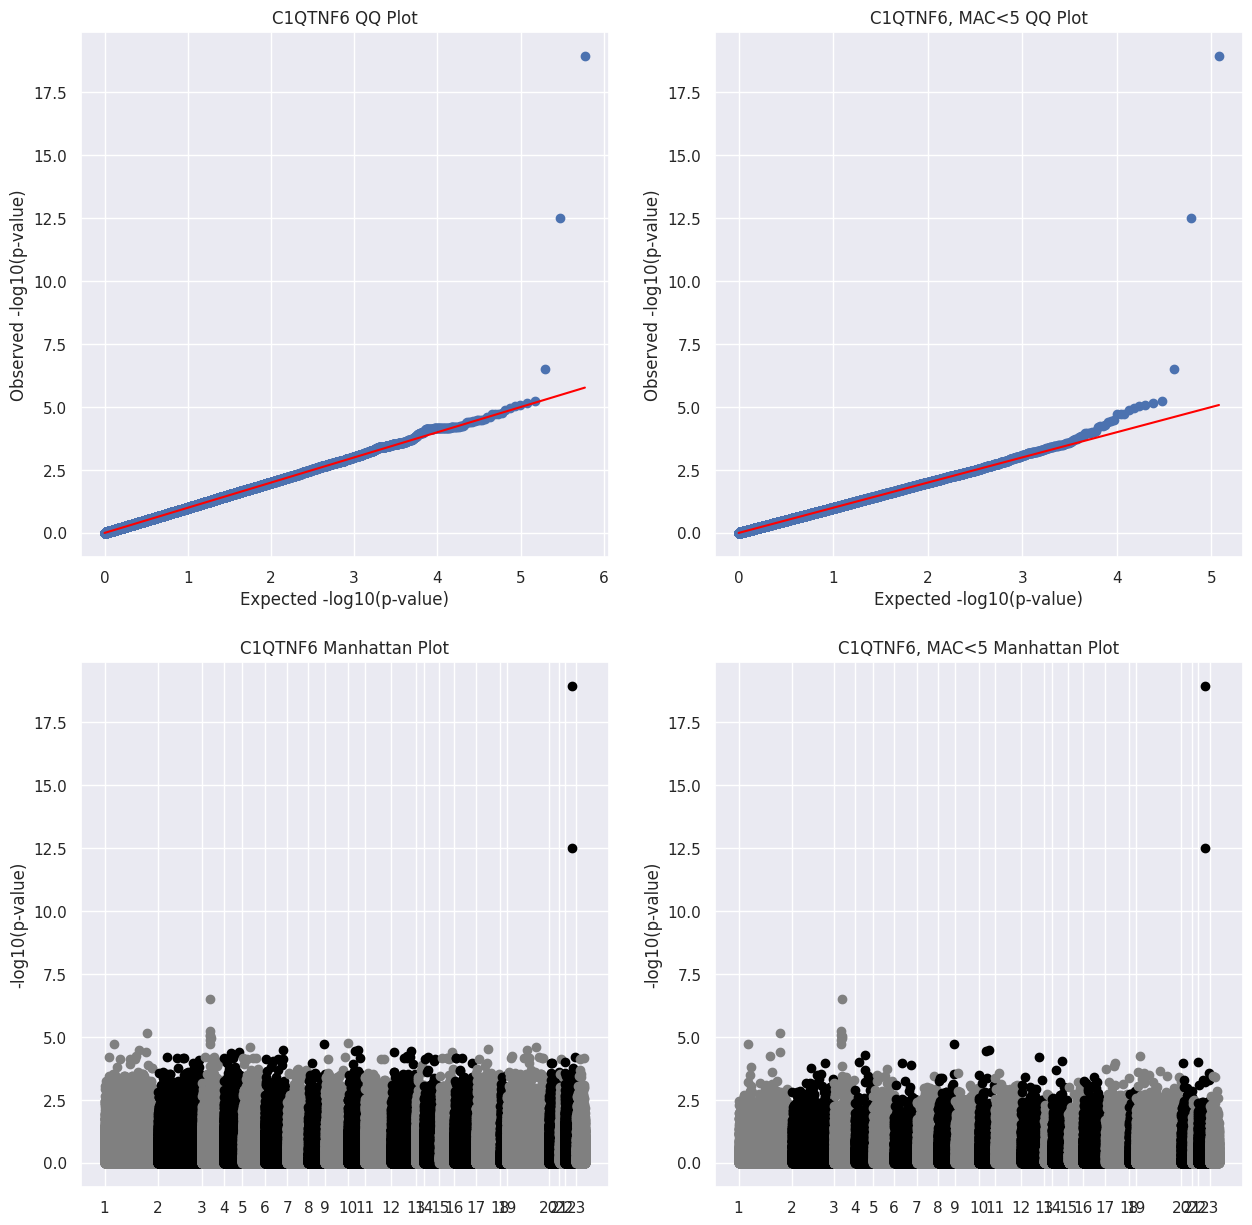

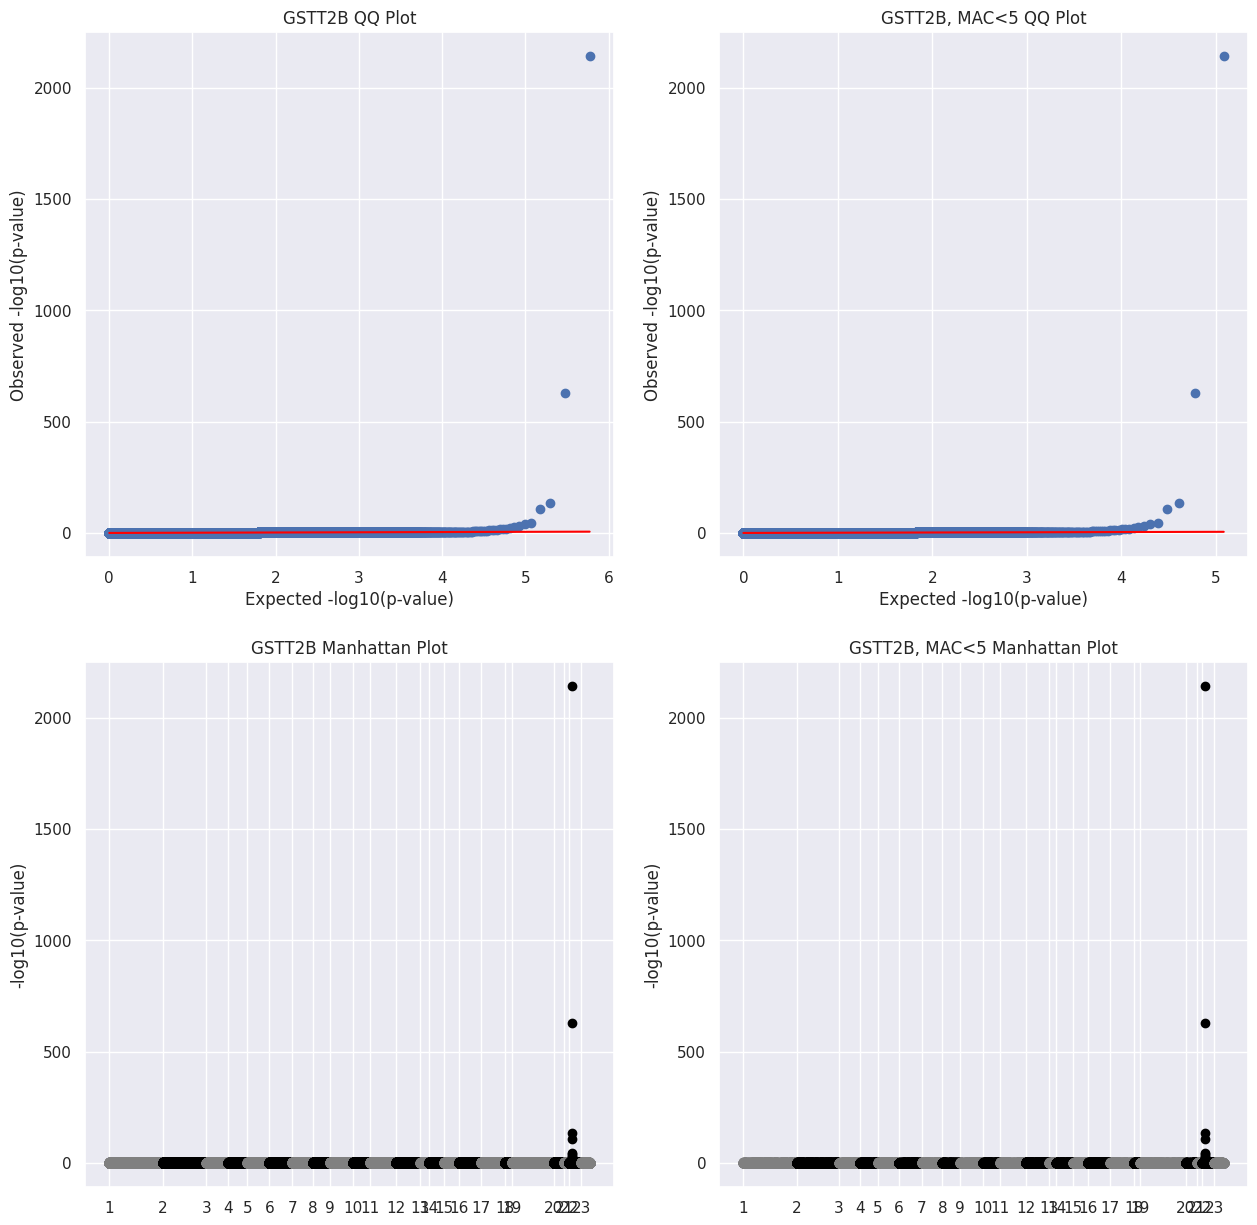

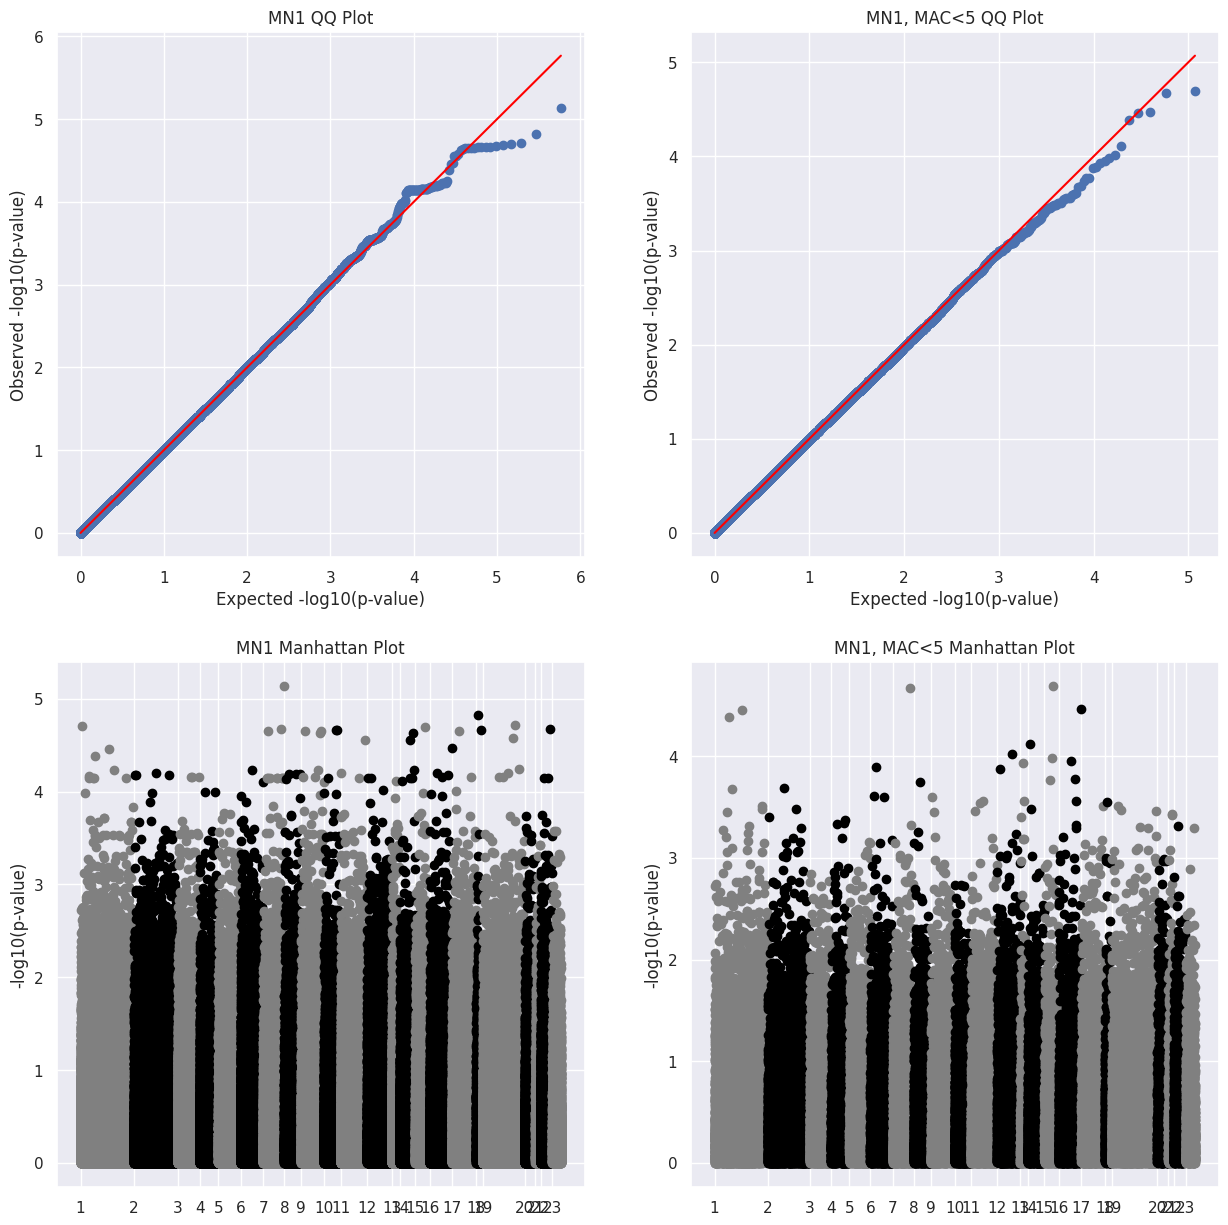

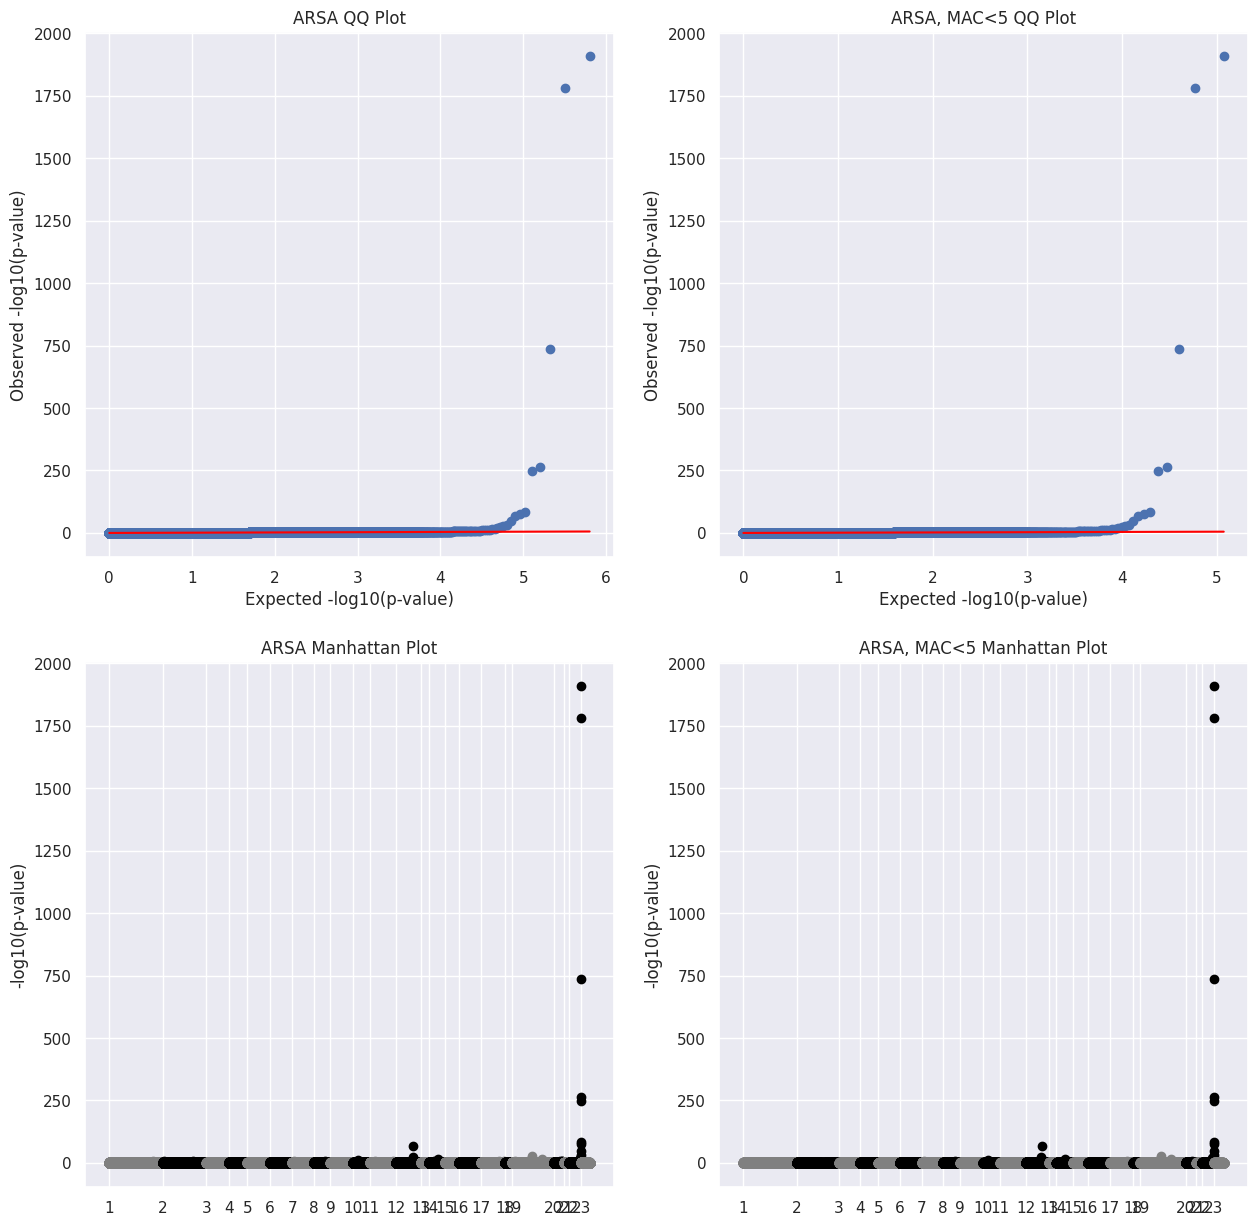

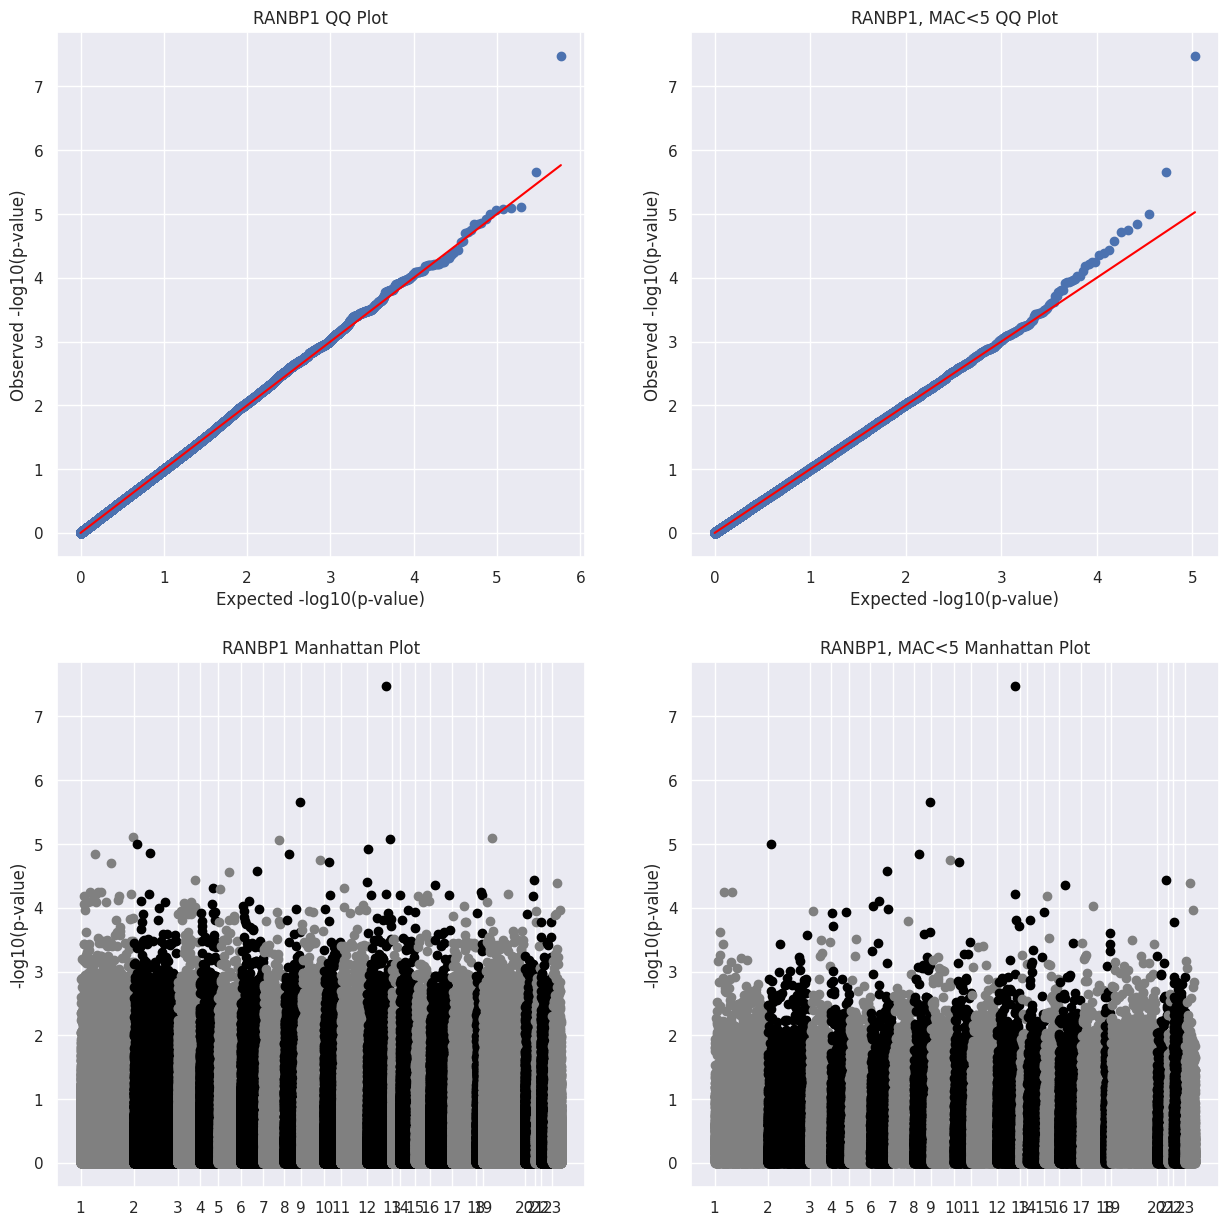

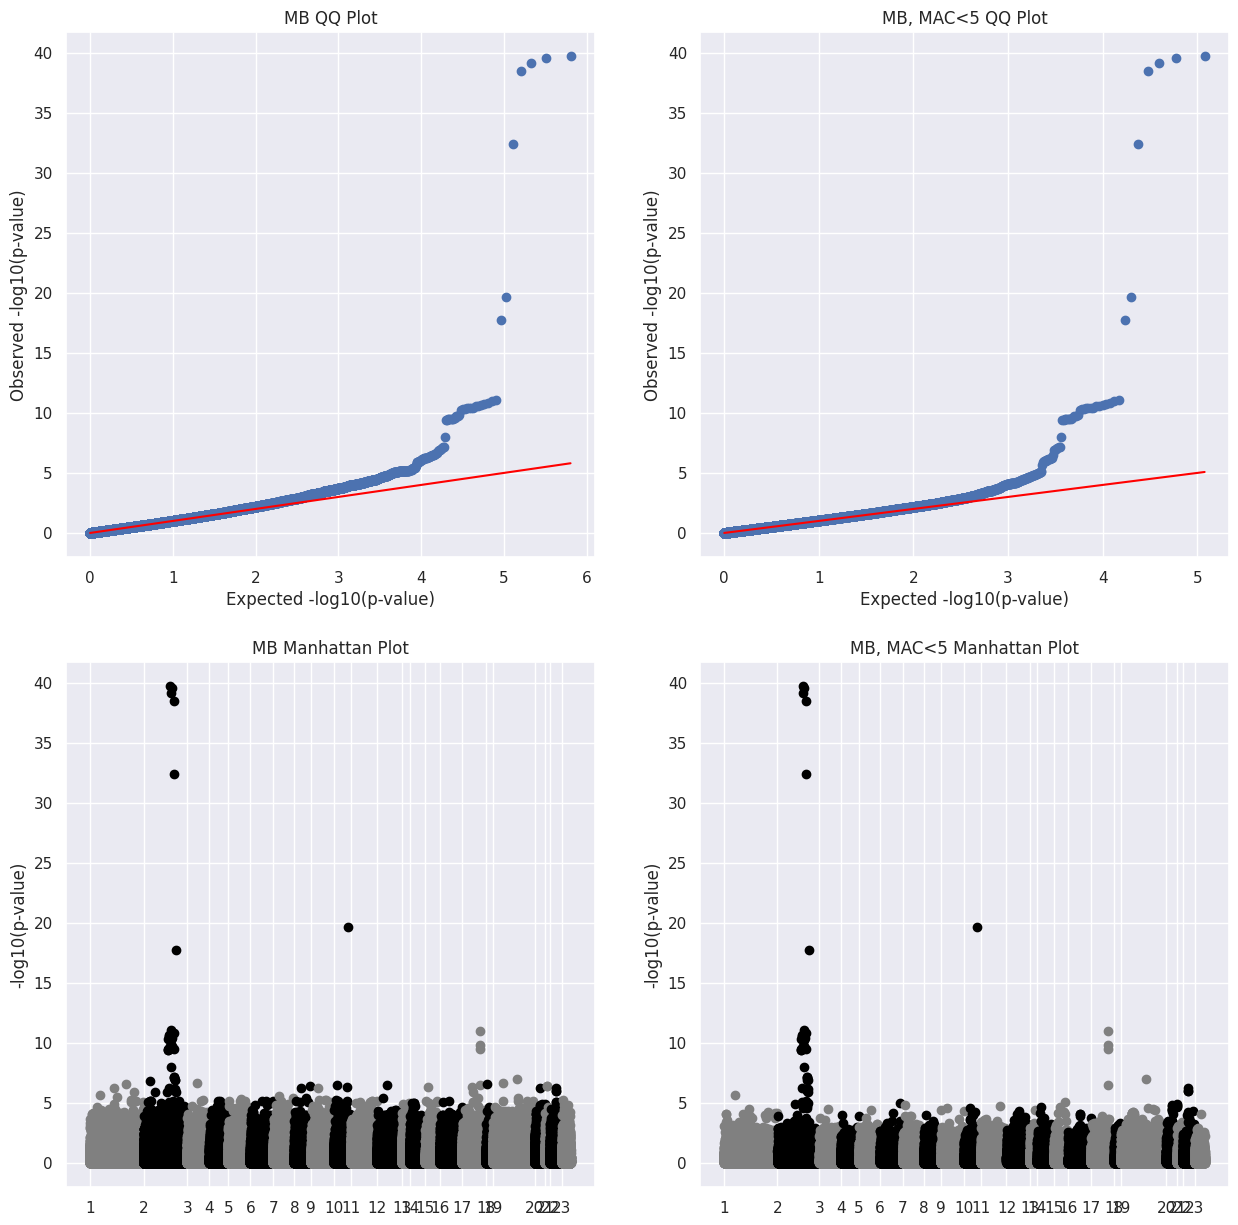

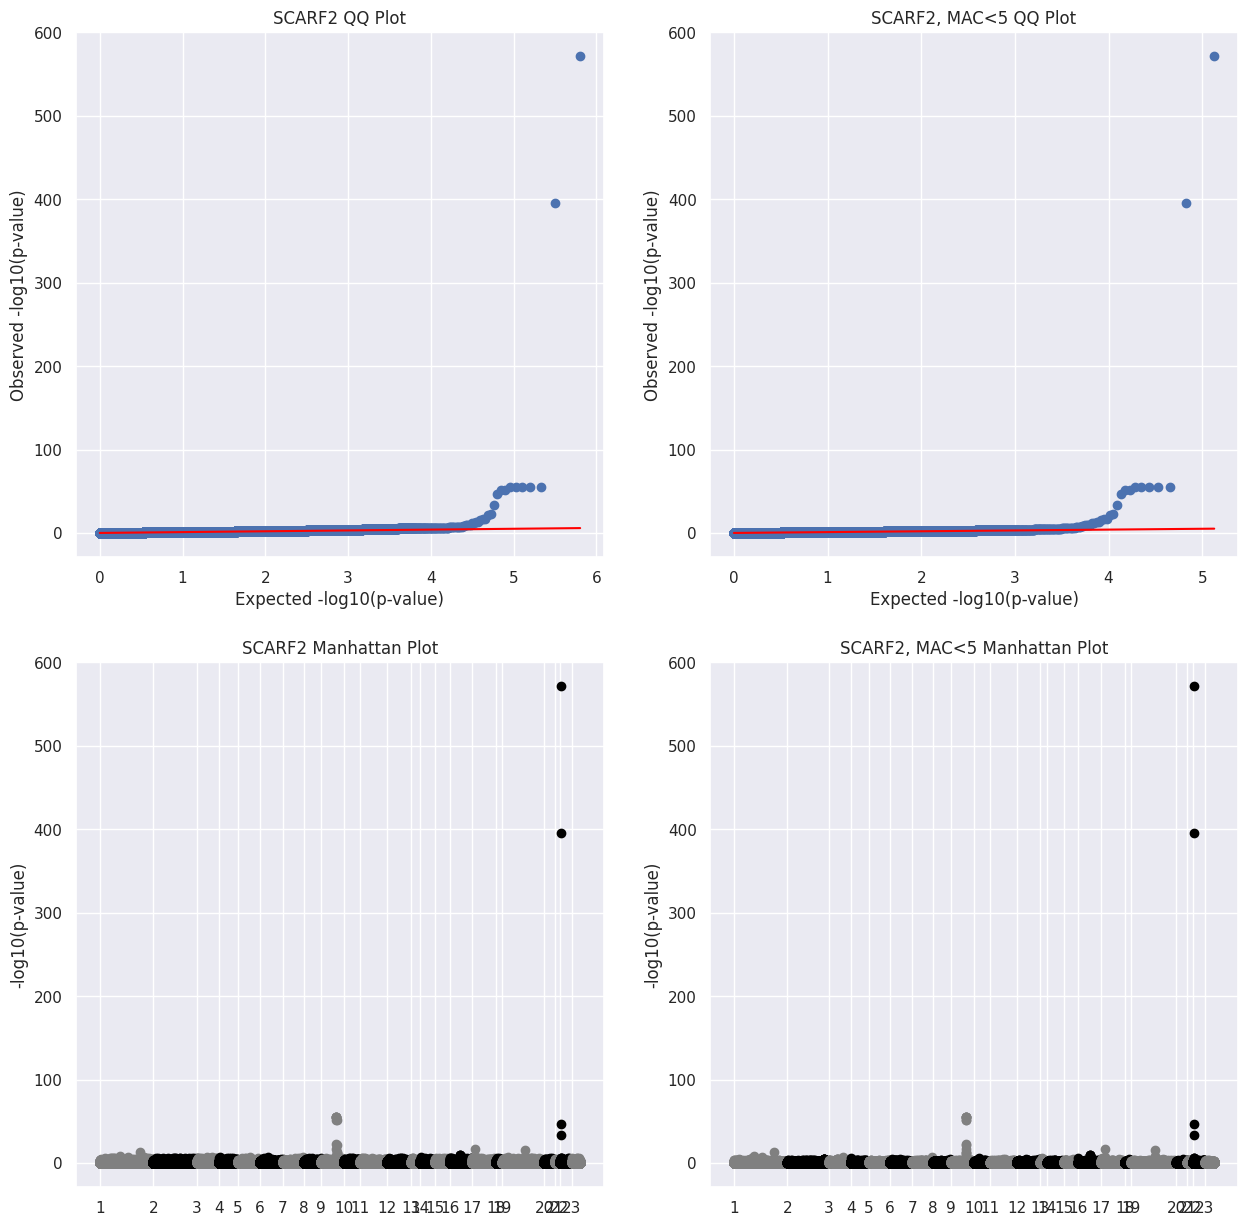

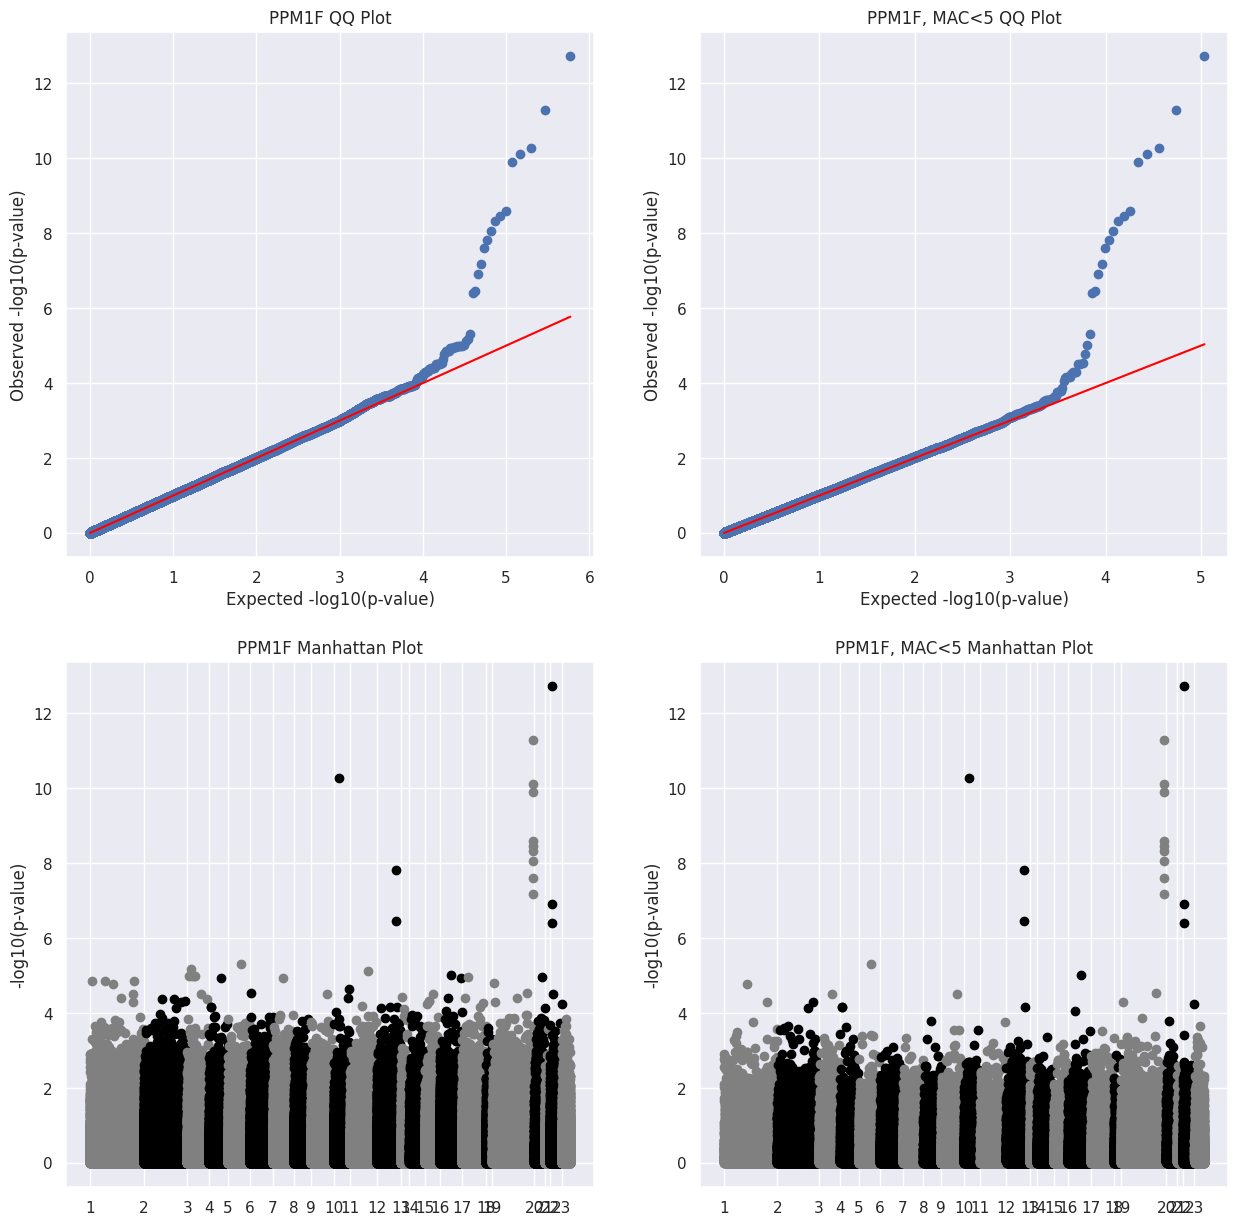

In [8]:
# Run the function for each protein in the sample
for prot in samp:
    plot_gwas_results(directory, prot)

# Chr1 Verification

In [3]:
# List of the chr1 olink proteins
proteins = []
with open('/home/jupyter/gcs/ukb/regenie/phenos/chr1_olink_genes.txt') as file:
    for line in file:
        proteins.append(line.rstrip())

In [4]:
# Randomly select 10 proteins from the list
import random
samp = random.sample(proteins, 10)

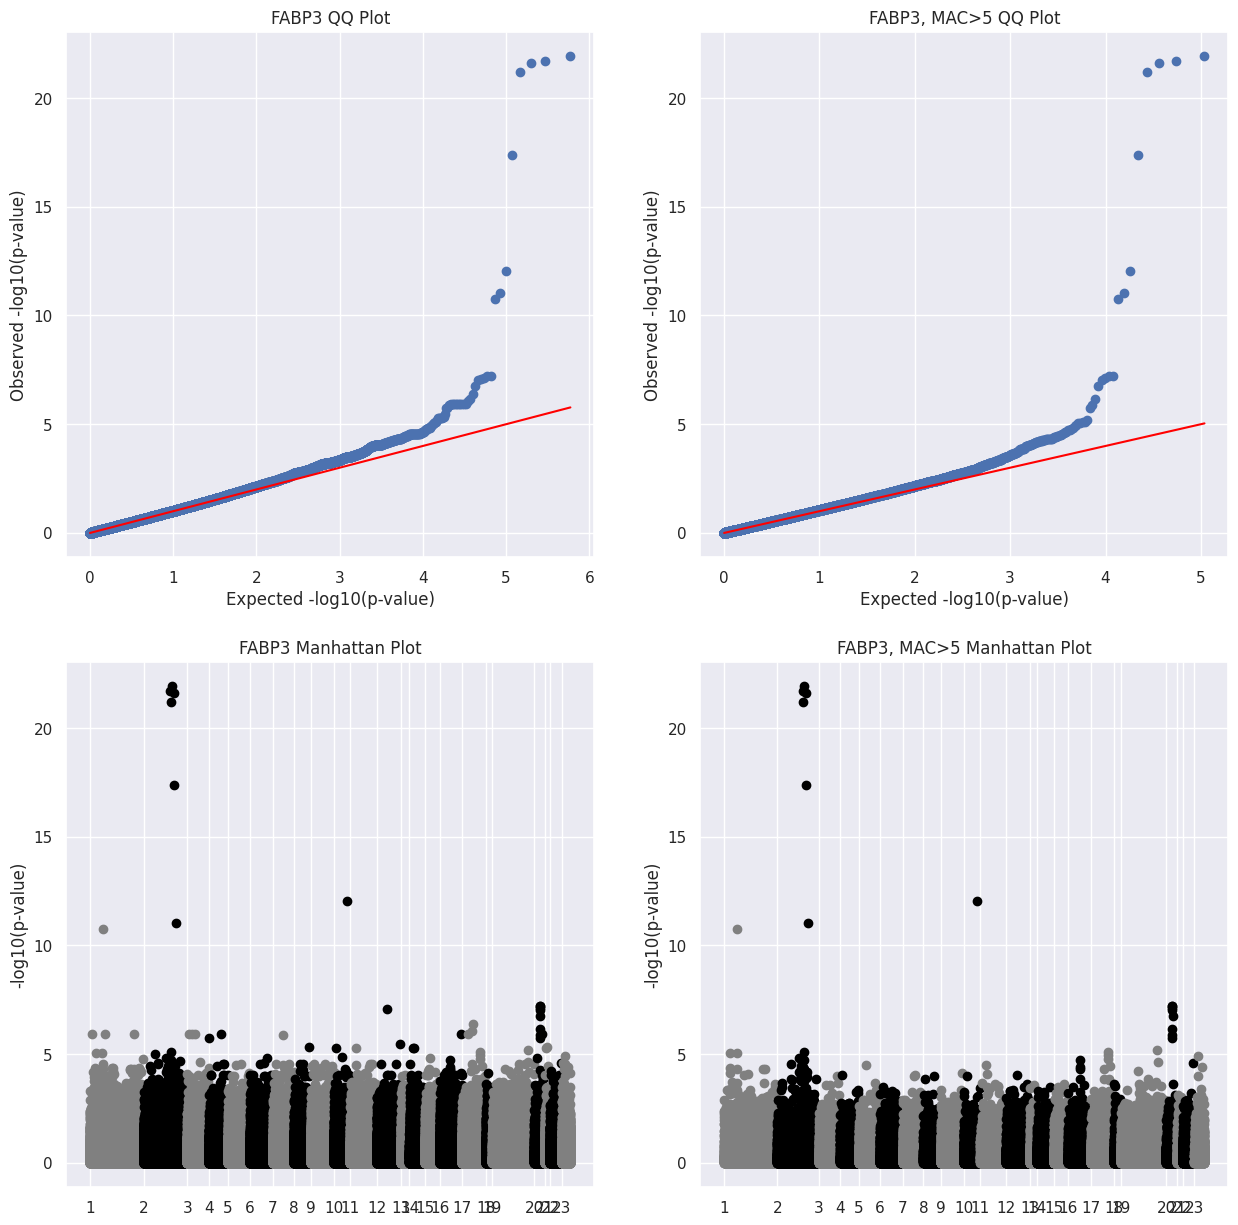

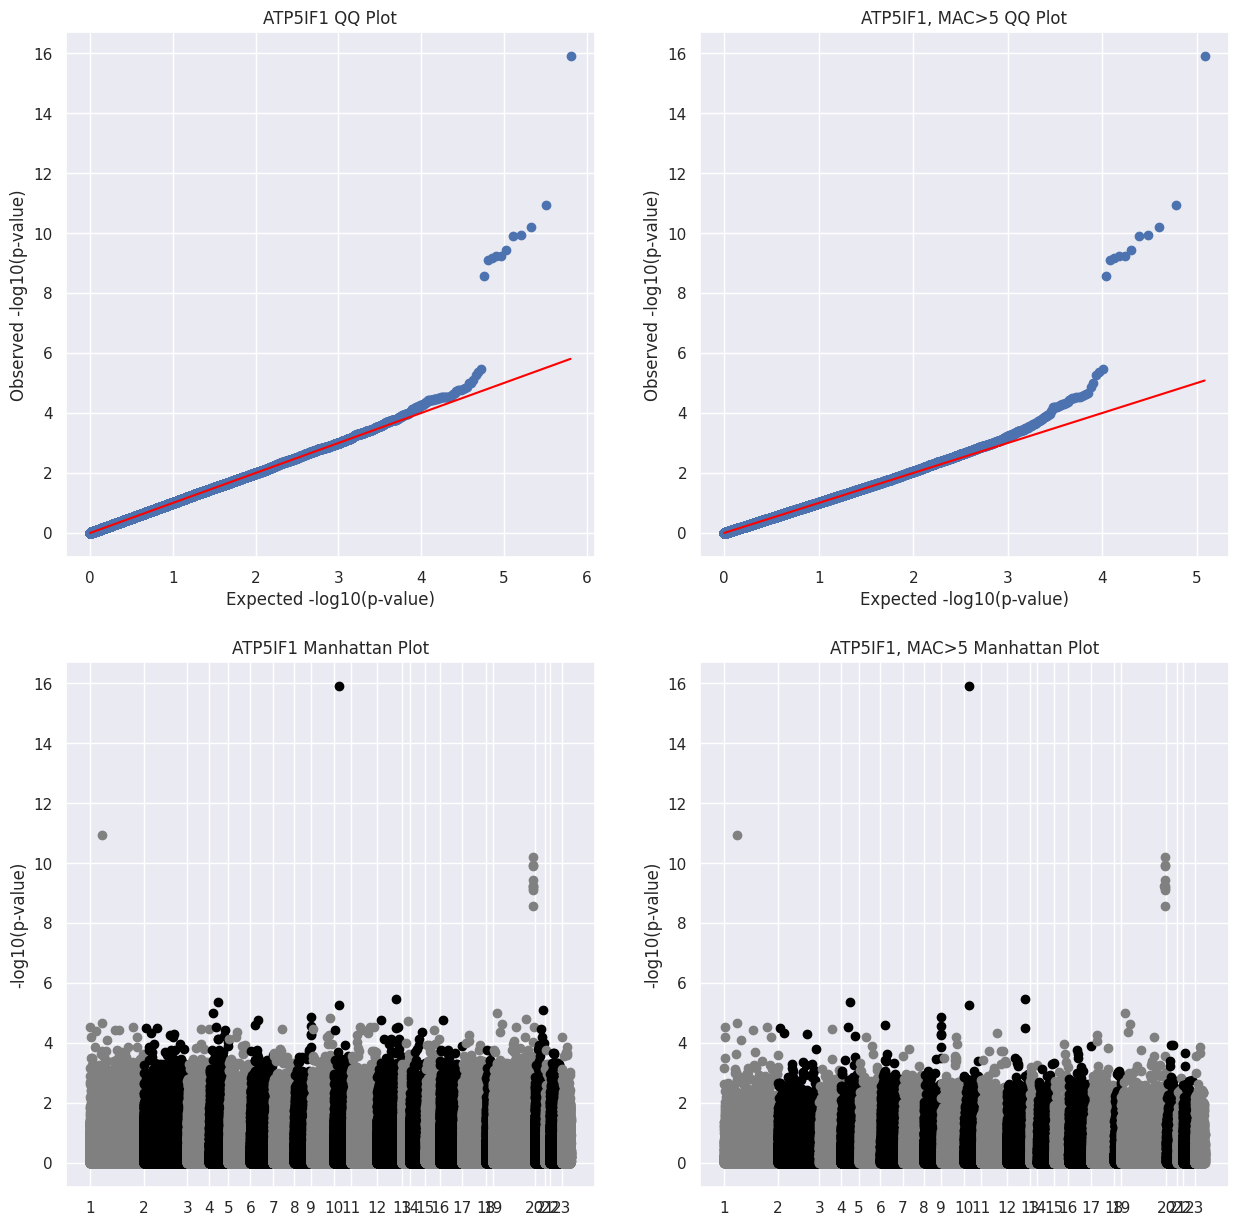

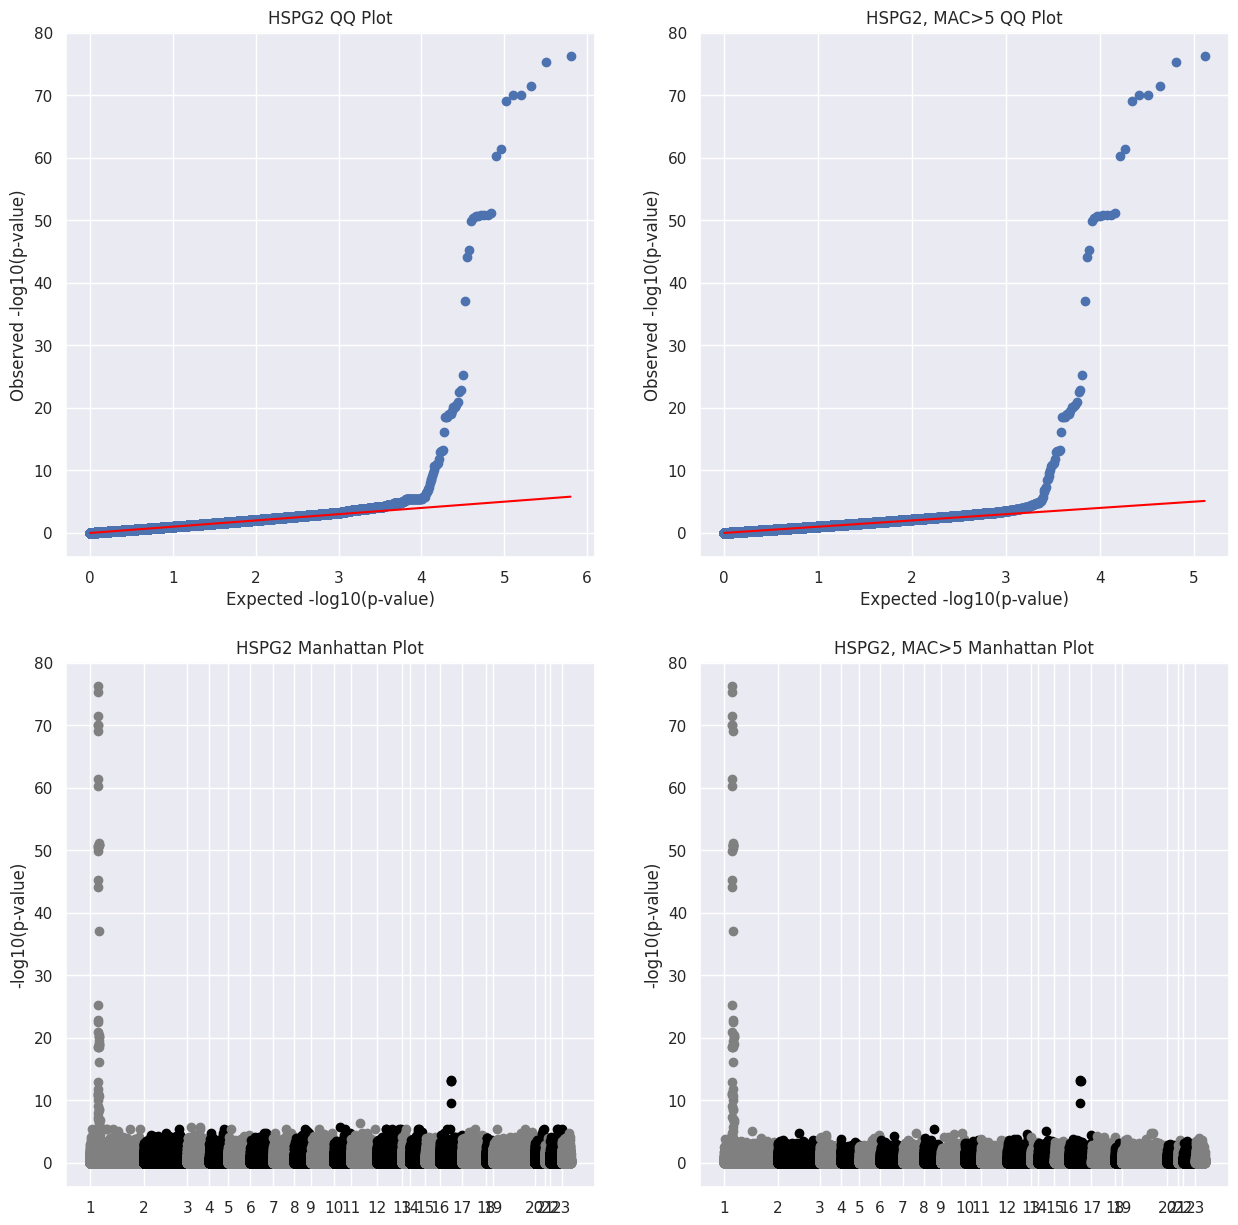

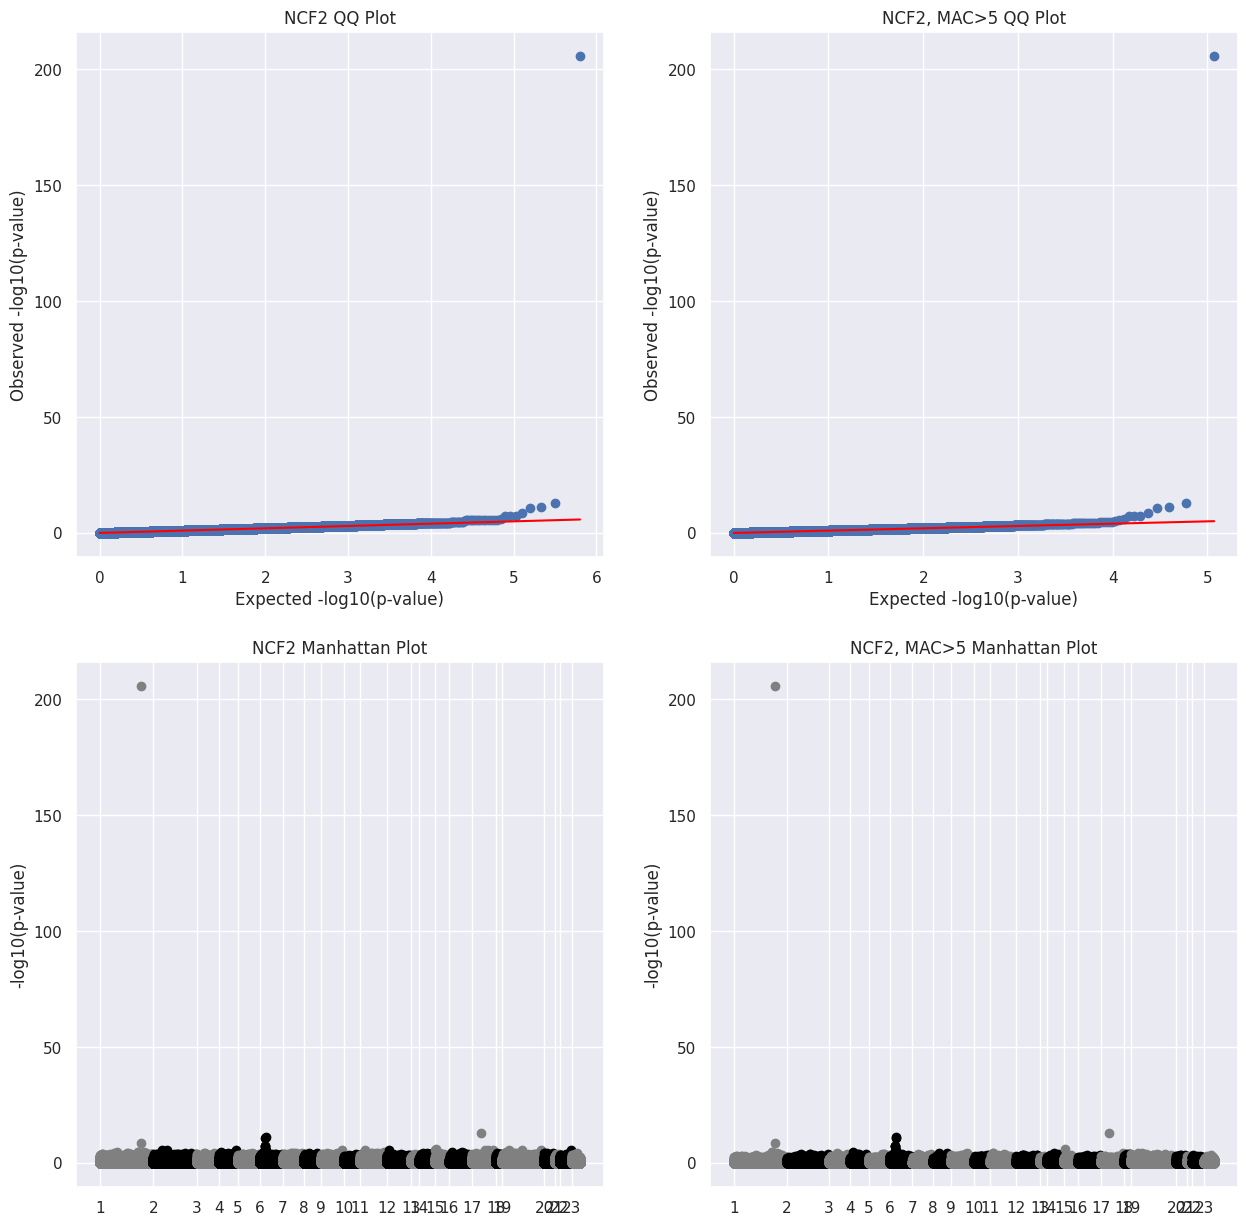

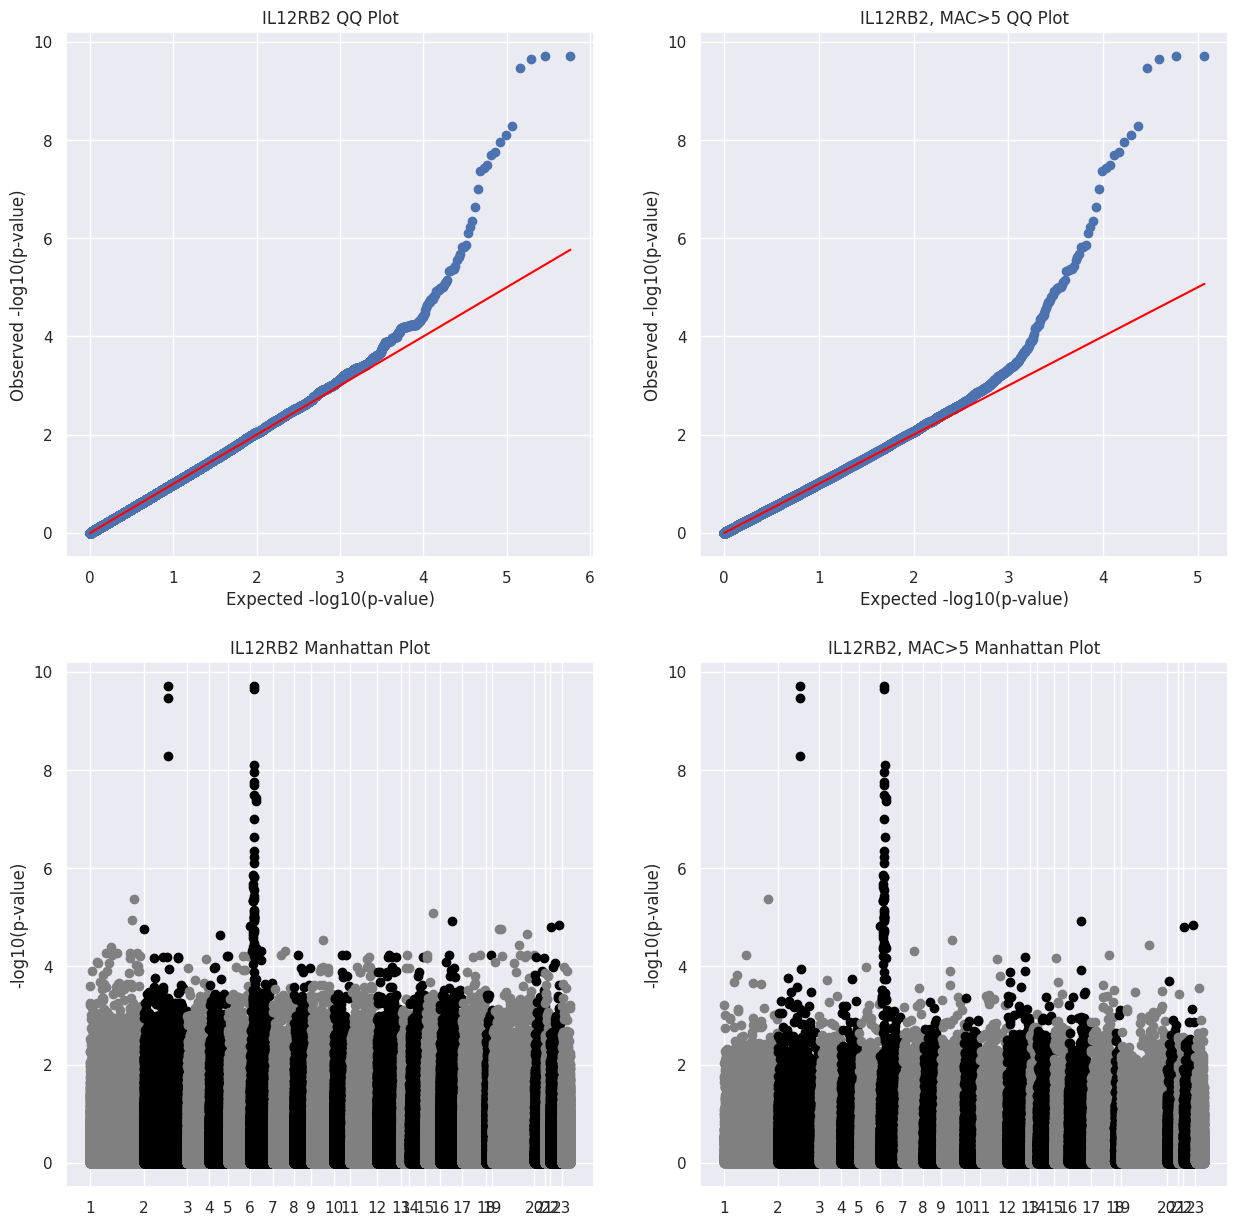

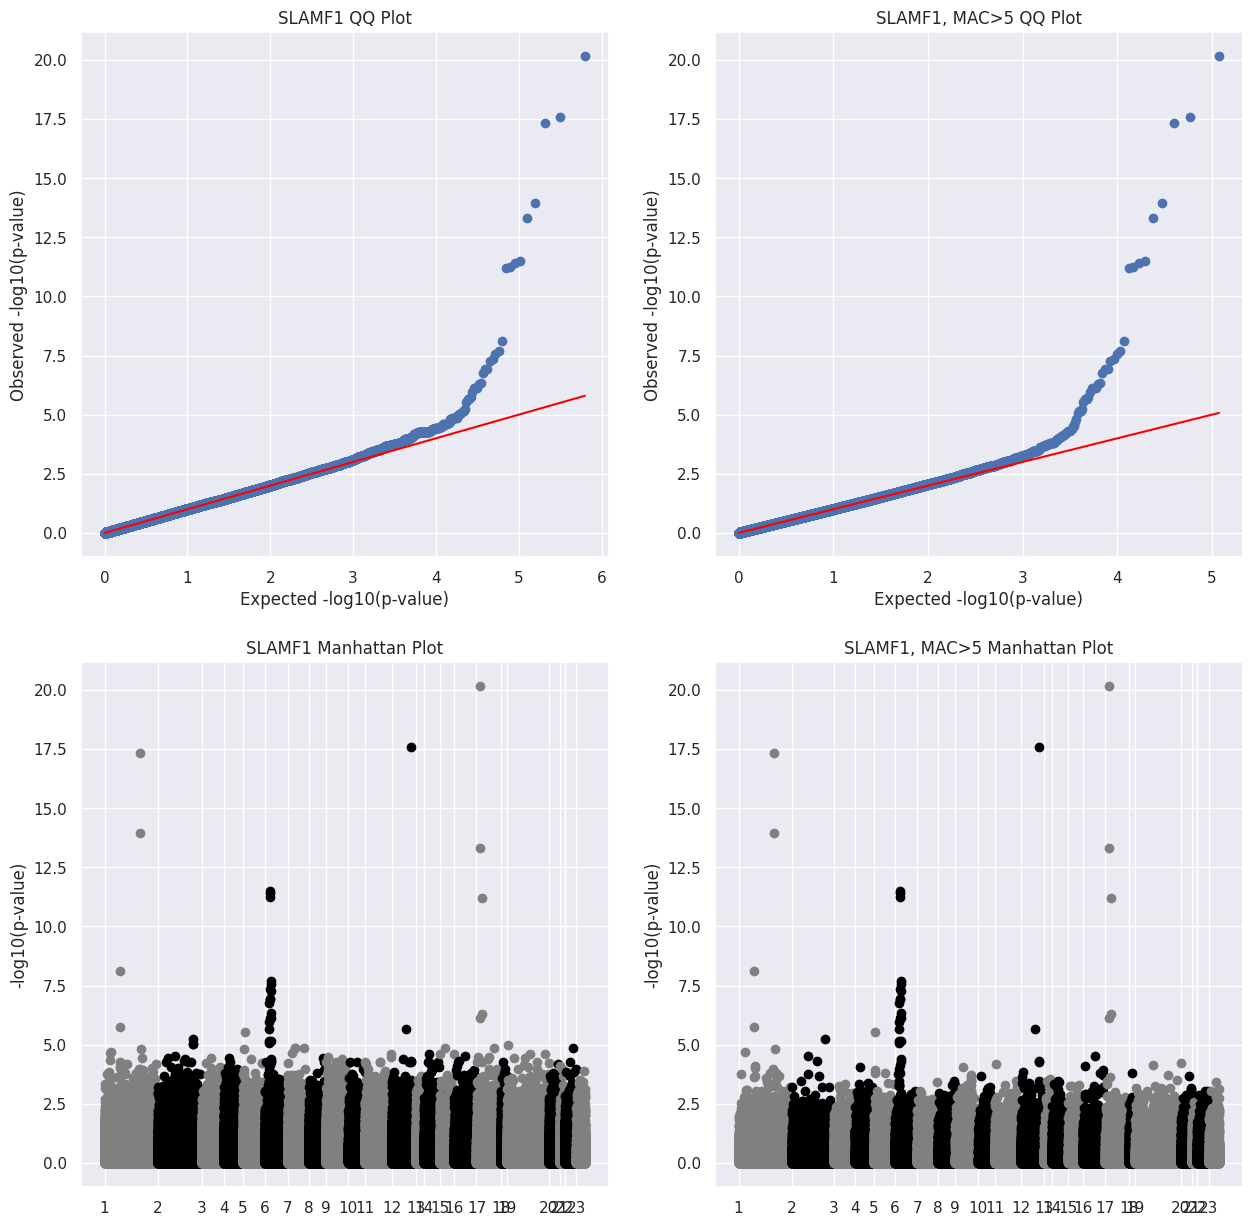

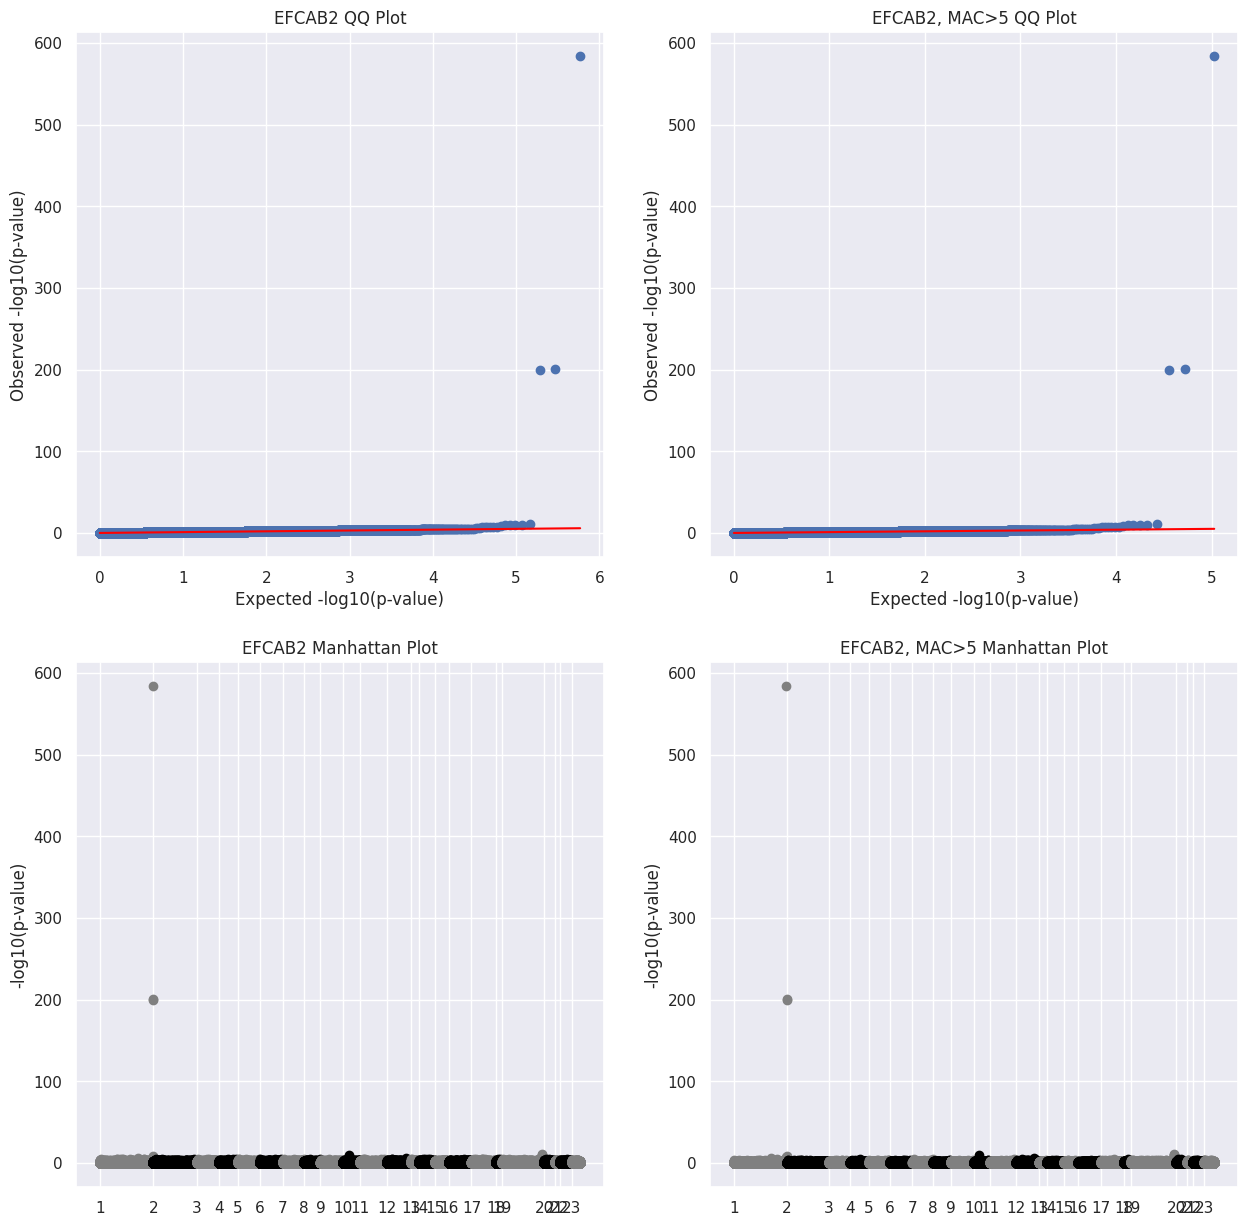

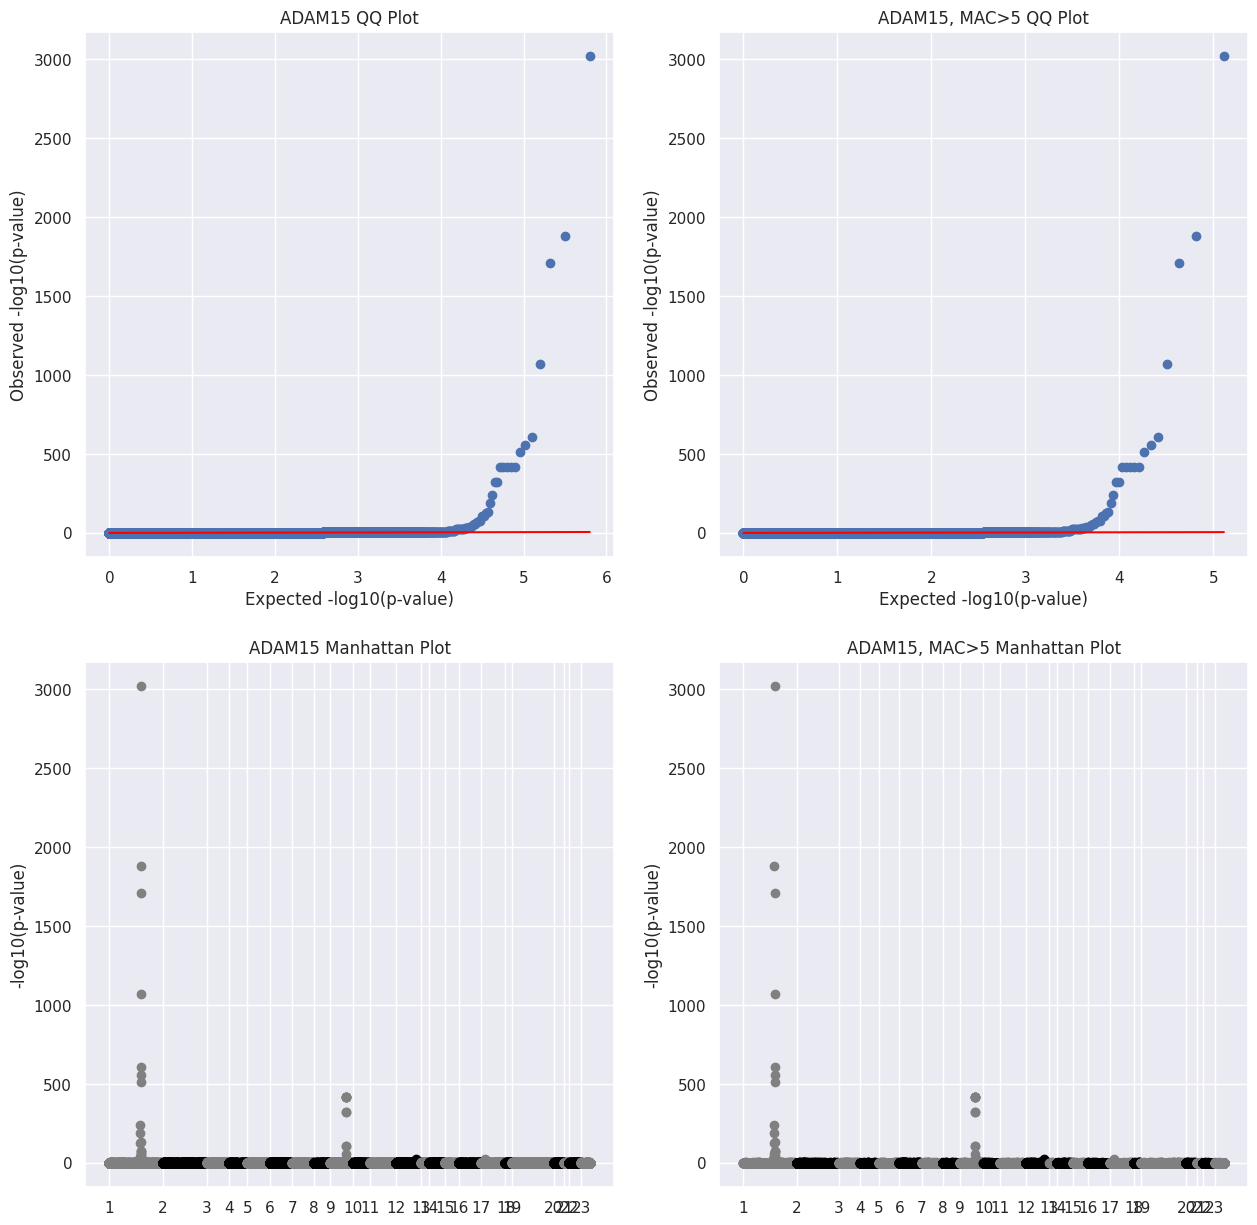

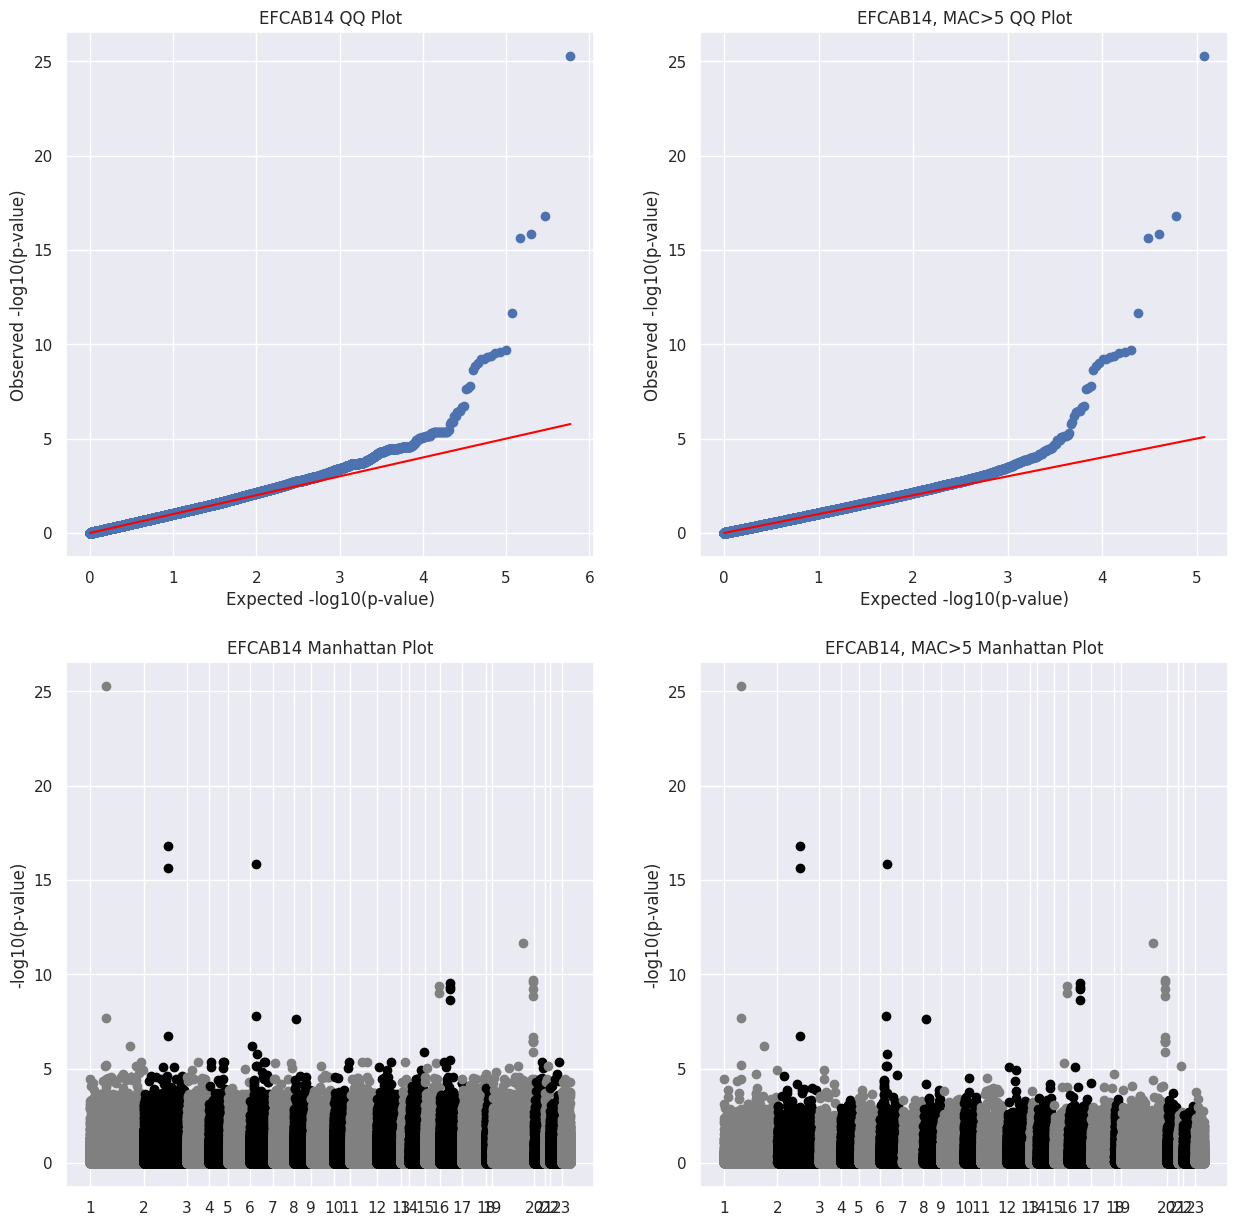

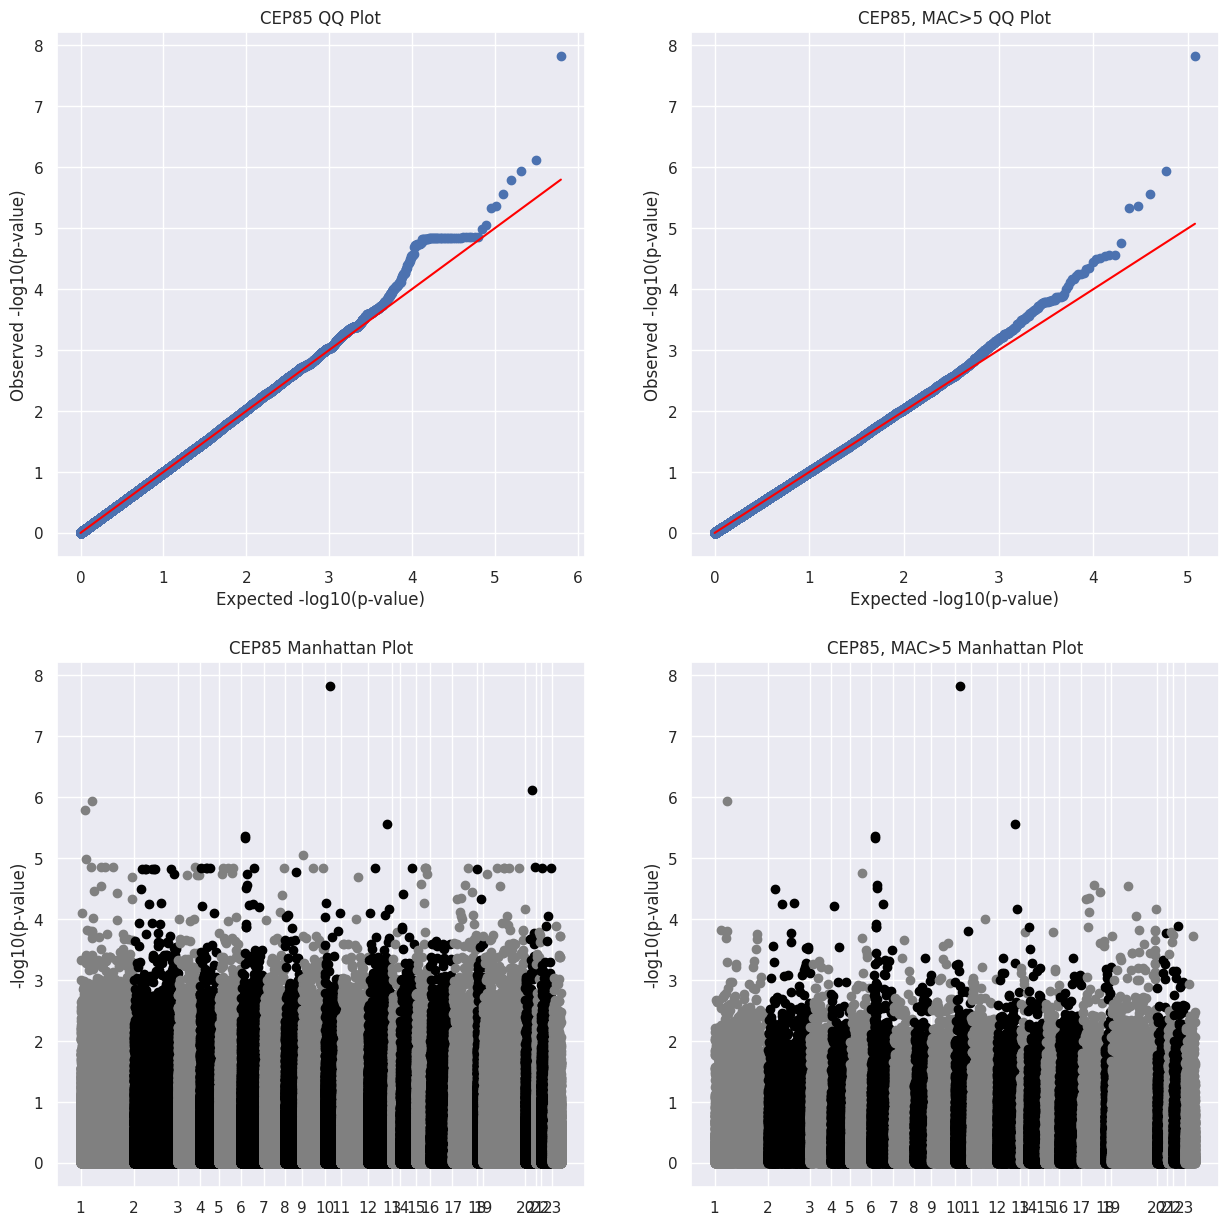

In [5]:
# Run the function for each protein in the sample
for prot in samp:
    plot_gwas_results('/home/jupyter/gcs/ukb/regenie/gwas_allOthers/step2/chr1prots/', prot)